# Dimensionality Reduction & Clustering

- Reading: Geron, chapters 8 and 9

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


- Many Machine Learning problems involve thousands or even millions of features for each training instance.
- Not only does this make training extremely slow, it can also make it much harder to find a good solution.

- This problem is often referred to as **the curse of dimensionality**.
- Fortunately, in real-world problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one.

    - For example, in the MNIST images the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information.
    
- Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization. Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph.


### The Curse of Dimensionality

- Our intuition fails us when we try to imagine a high-dimensional space.

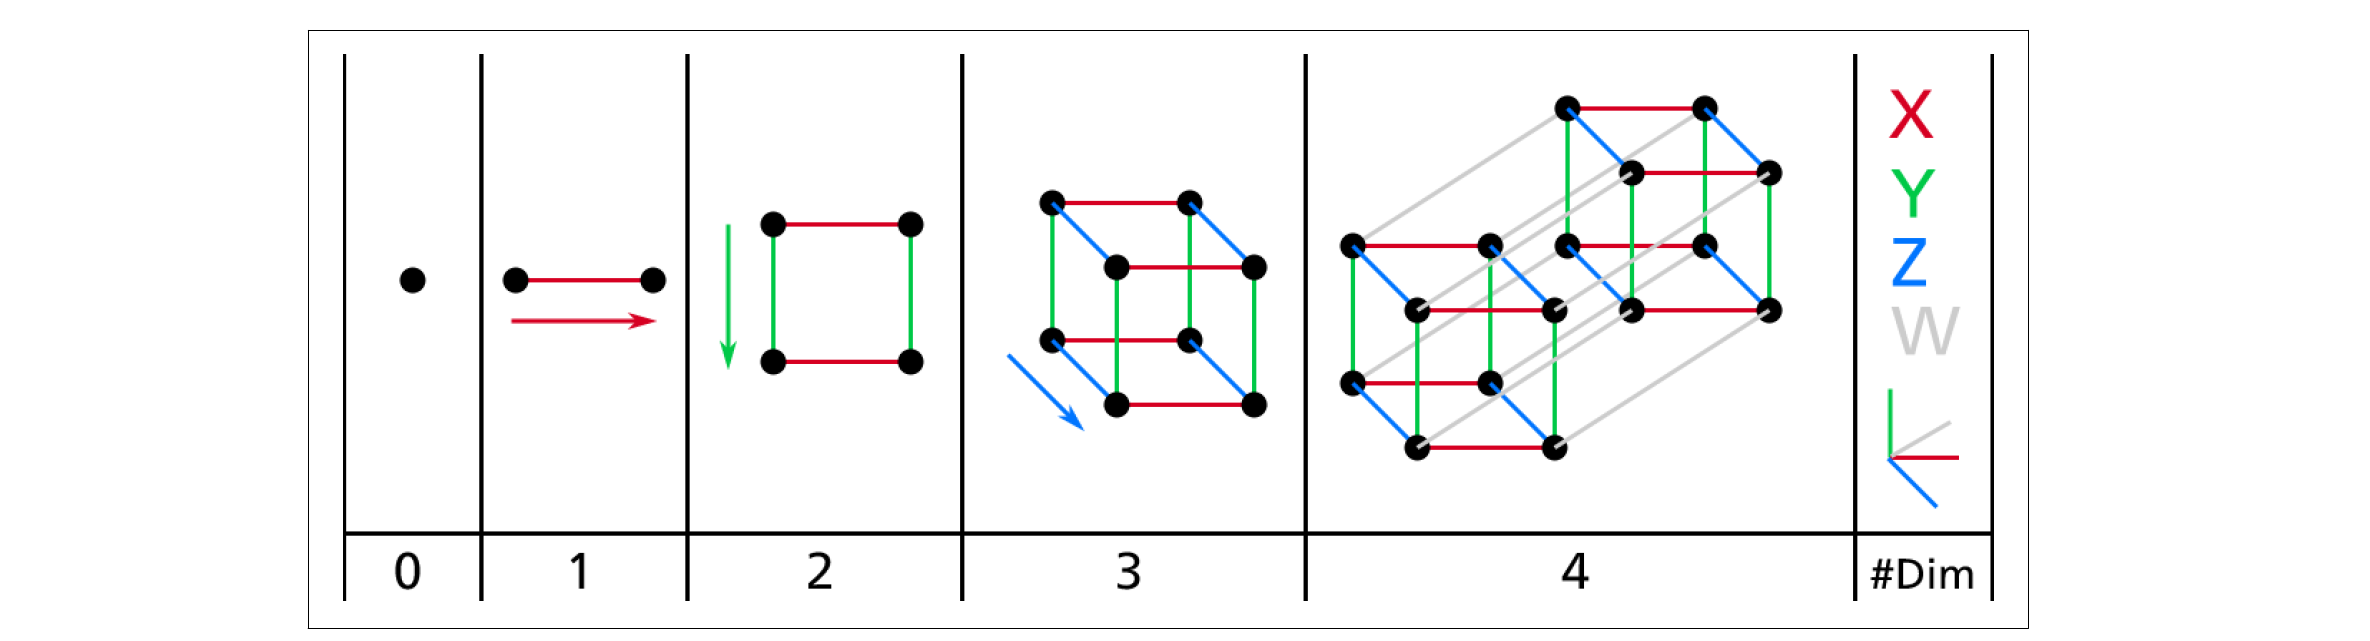

- It turns out that many things behave very differently in high-dimensional space.

    - if you pick a random point in a unit square (a 1×1 square), it will have only about a 0.4% chance of being located less than 0.001 from a border. But in a 10,000-dimensional unit hypercube, this probability is greater than 99.999999%. Most points in a high-dimensional hypercube are very close to the border!
    - if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. The average distance between two points picked randomly in a 1,000,000-dimensional hypercube will be about 408.25! 
    
- **Datasets of instances in a high-dimensional space tend to be sparse**.
    
- This means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations.

- In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances.
- Unfortunately, in practice, the number of training instances required to reach a given density **grows exponentially with the number of dimensions**.
    - With just 100 features you would need more training instances than atoms in the
observable universe in order for training instances to be within 0.1 of each other on
average, assuming they were spread out uniformly across all dimensions.

### Two main approaches to reducing dimensionality: Projection and Manifold Learning

#### Projection

- In most real-world problems, training instances are not spread out uniformly across all dimensions.
- Many features are almost constant, while others are highly correlated. As a result, all training instances actually lie within (or close to) a much lower-dimensional subspace of the high-dimensional space.

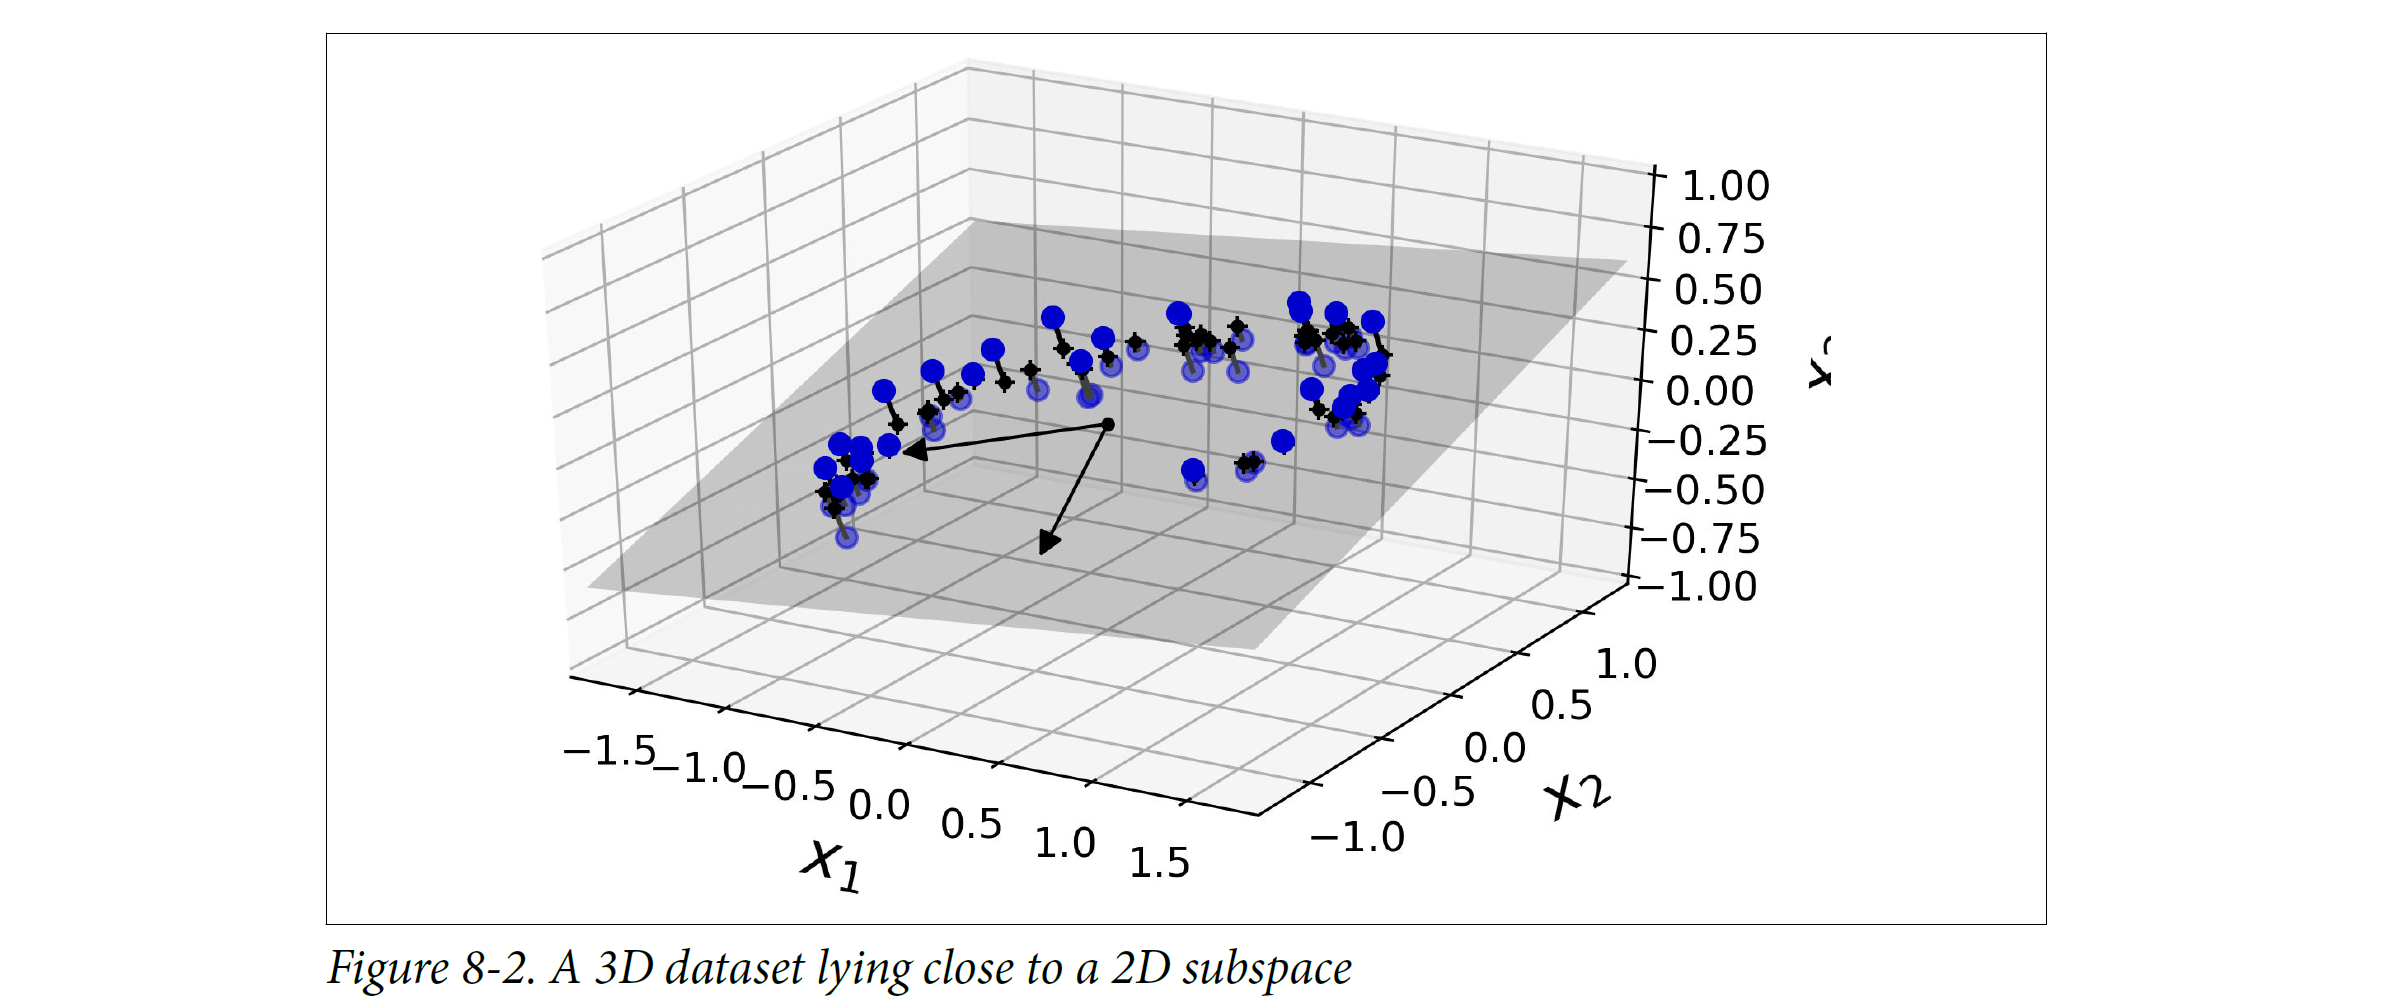

- If we project every training instance perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), we get the new 2D dataset.

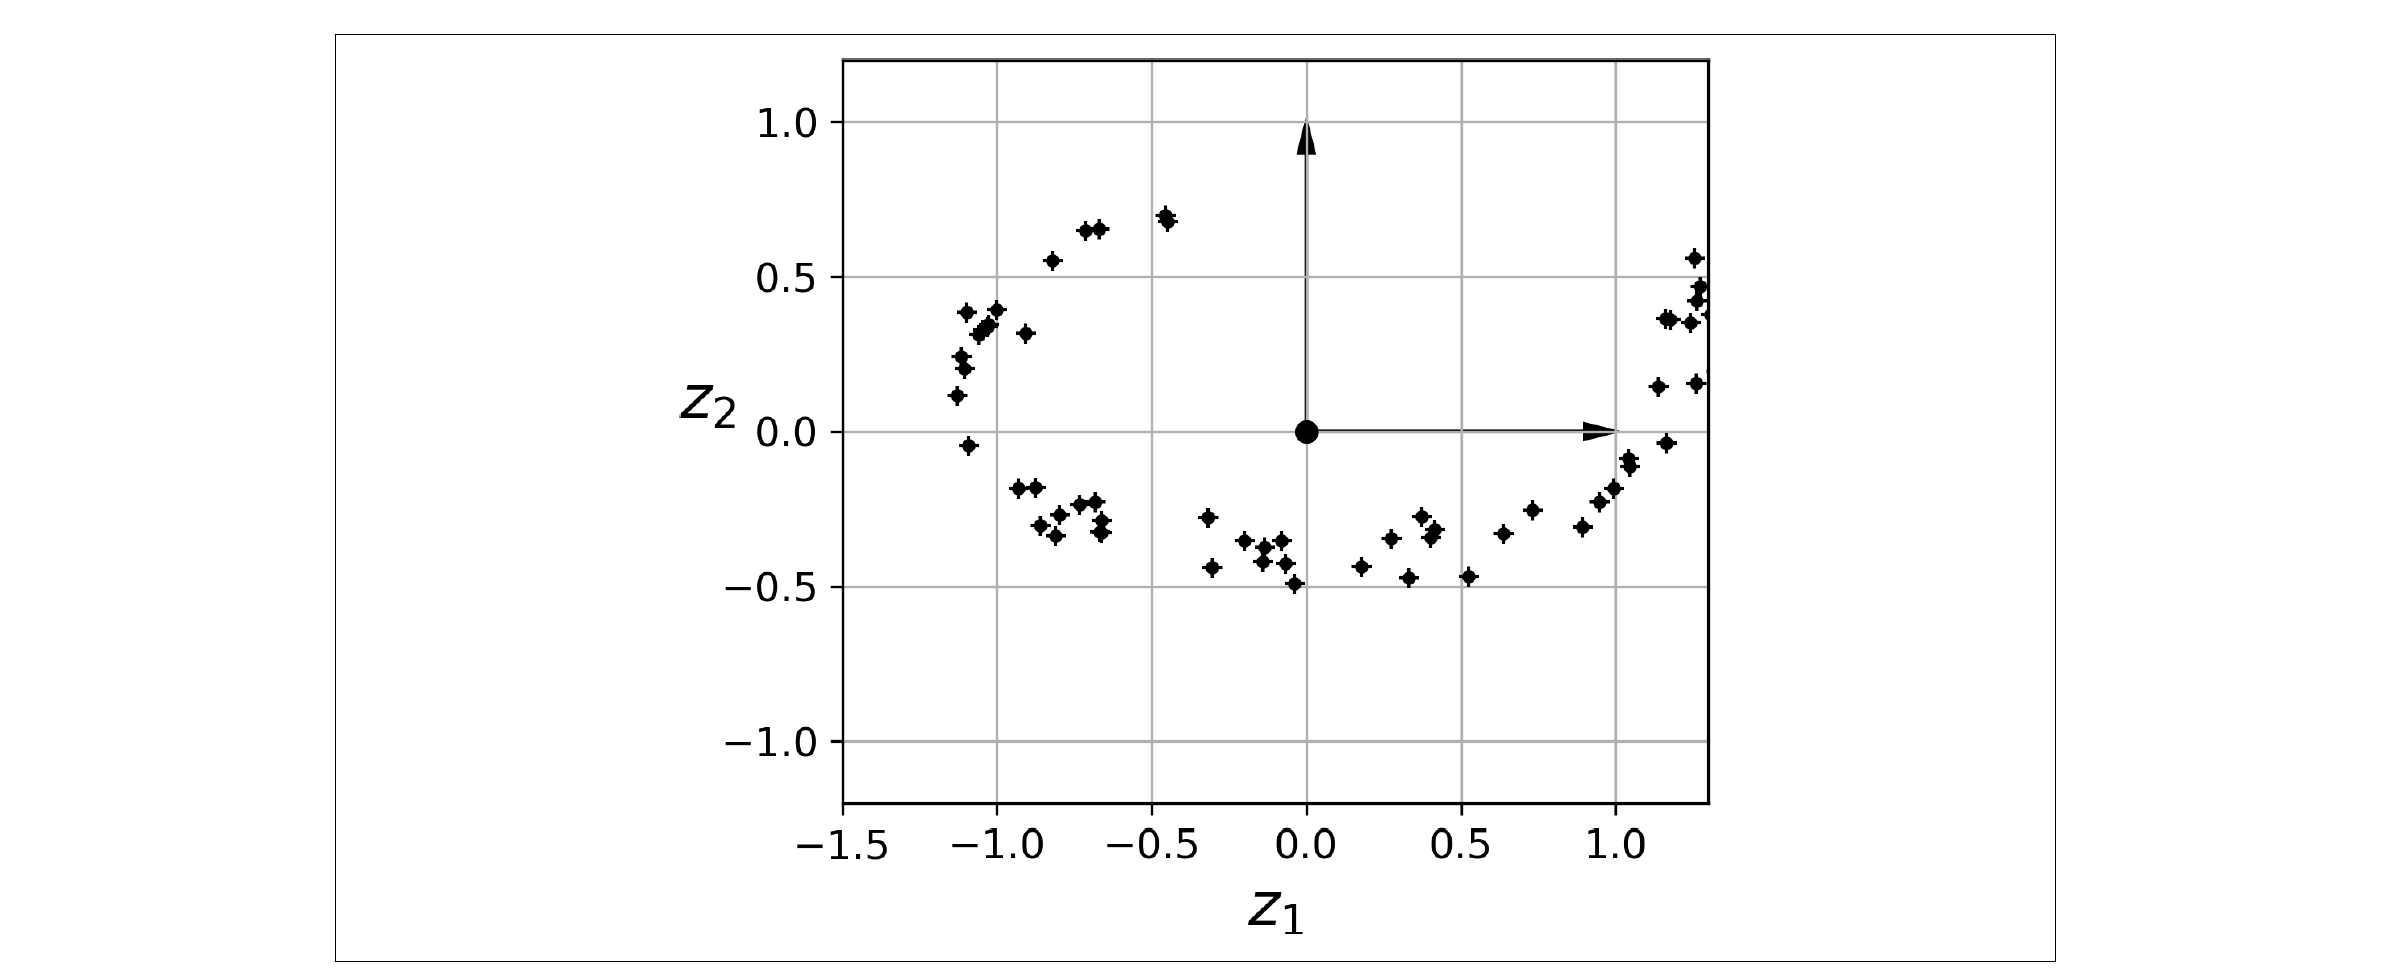

- The dataset’s dimensionality is reduced from 3D to 2D.
- Note that the axes correspond to new features z1 and z2 (the coordinates of the projections on the plane).

- Projection is not always the best approach to dimensionality reduction.
- In many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset:

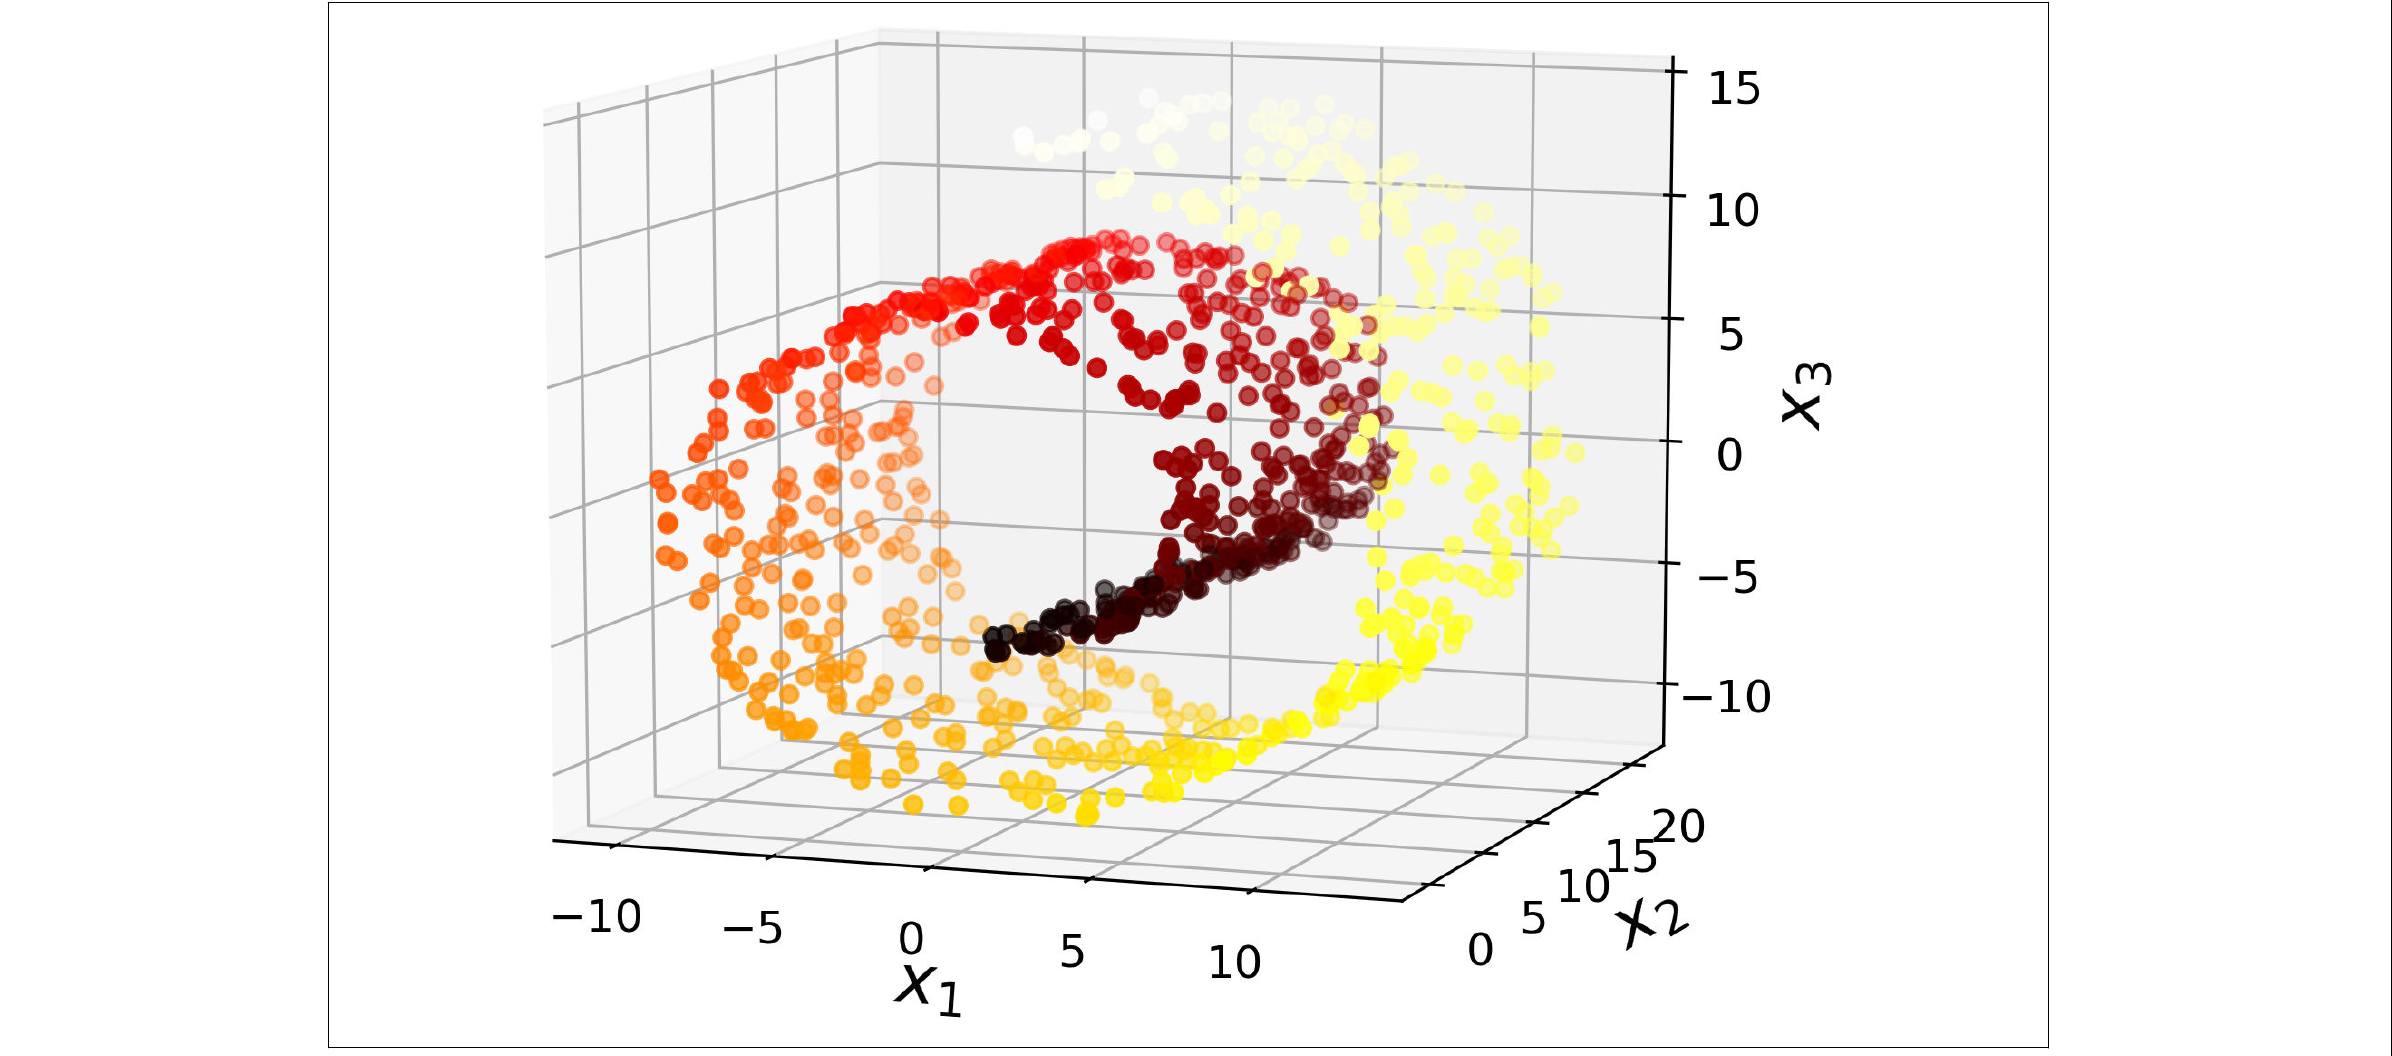

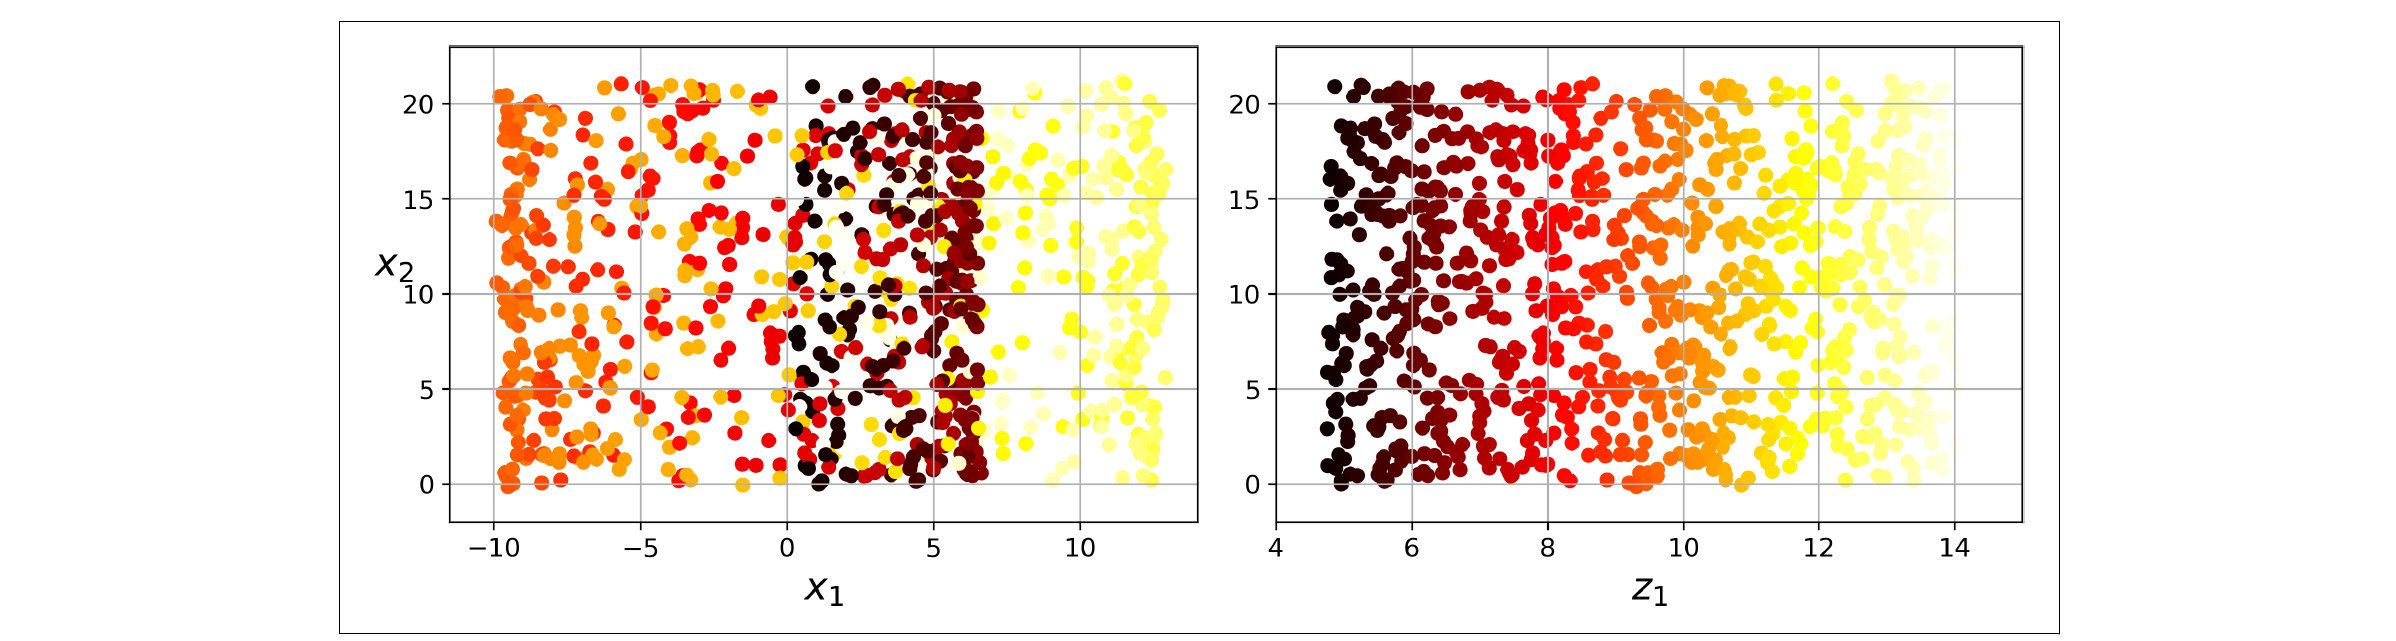

- Simply projecting onto a plane (e.g., by dropping x3) would squash different layers of the Swiss roll together (as shown on the left of the figure.
- However, what you really want is to unroll the Swiss roll to obtain the 2D dataset on the right figure.

#### Manifold Learning

- The Swiss roll is an example of a 2D manifold.
- Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space.
- More generally, a $d$-dimensional manifold is a part of an $n$-dimensional space (where $d<n$) that locally resembles a $d$-dimensional hyperplane.
- In the case of the Swiss roll, $d=2$ and $n=3$: it locally resembles a 2D plane, but it is rolled in the third dimension.

- Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called **Manifold Learning**.
- Manifold learning relies on the **manifold assumption/hypothesis**, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.
- This assumption is very often empirically observed.
    - For example, all handwritten digit images have some similarities. They are made of connected lines, the borders are white, they are more or less centered, and so on. If you randomly generated images, only a ridiculously tiny fraction of them would look like handwritten digits. 

- Another implicit assumption is that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold.

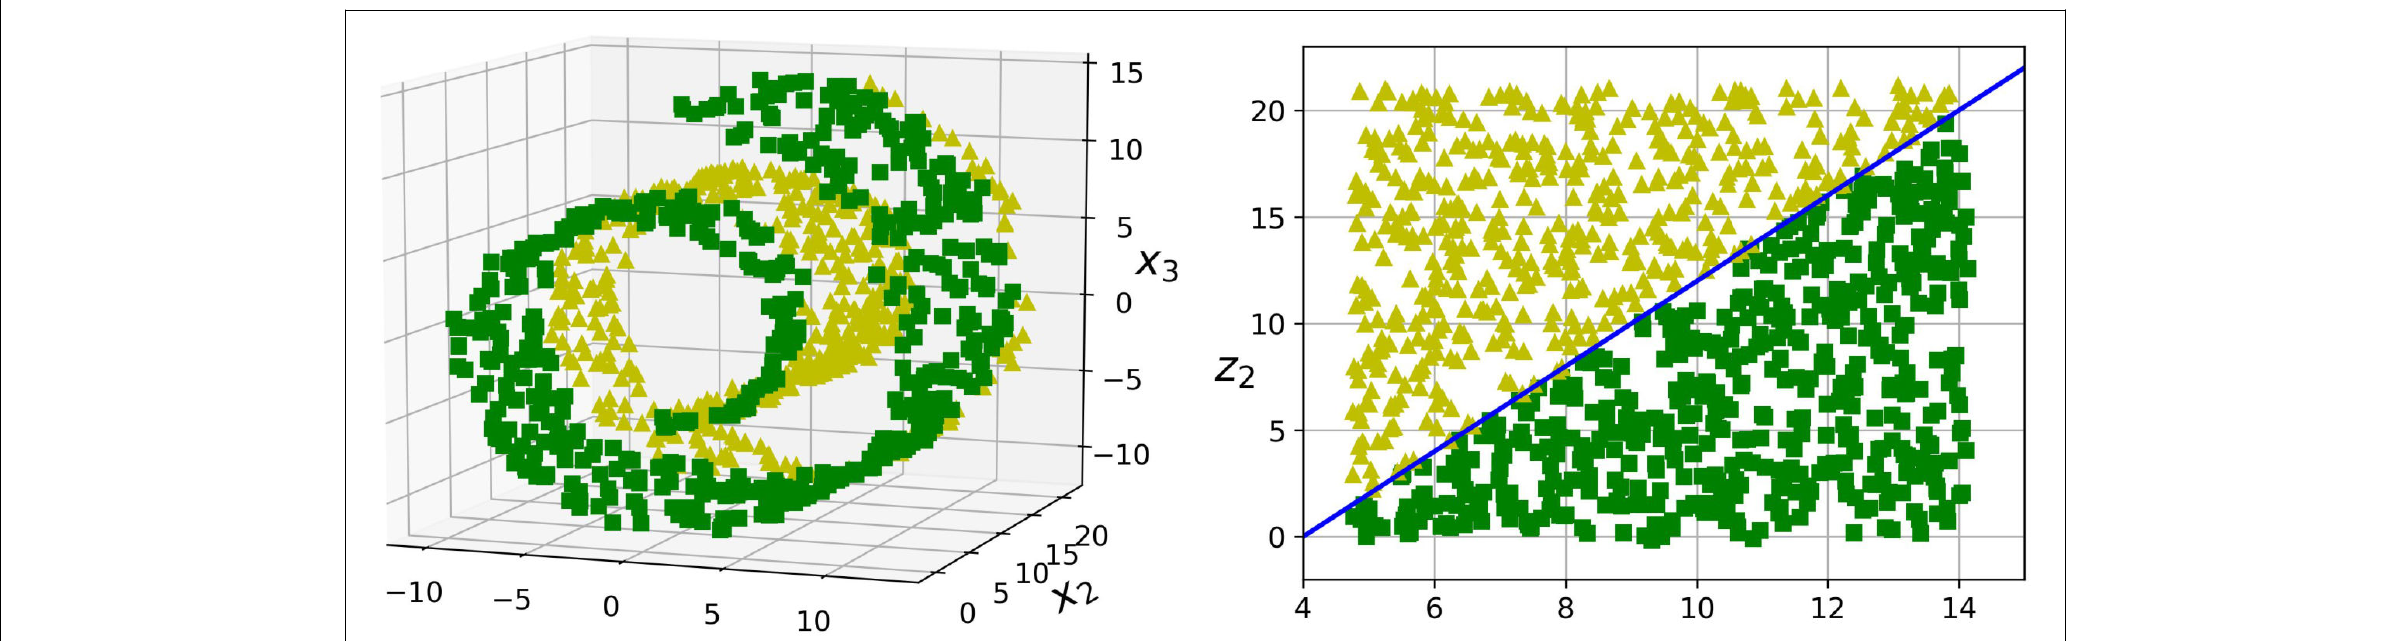



- However, this assumption does not always hold.

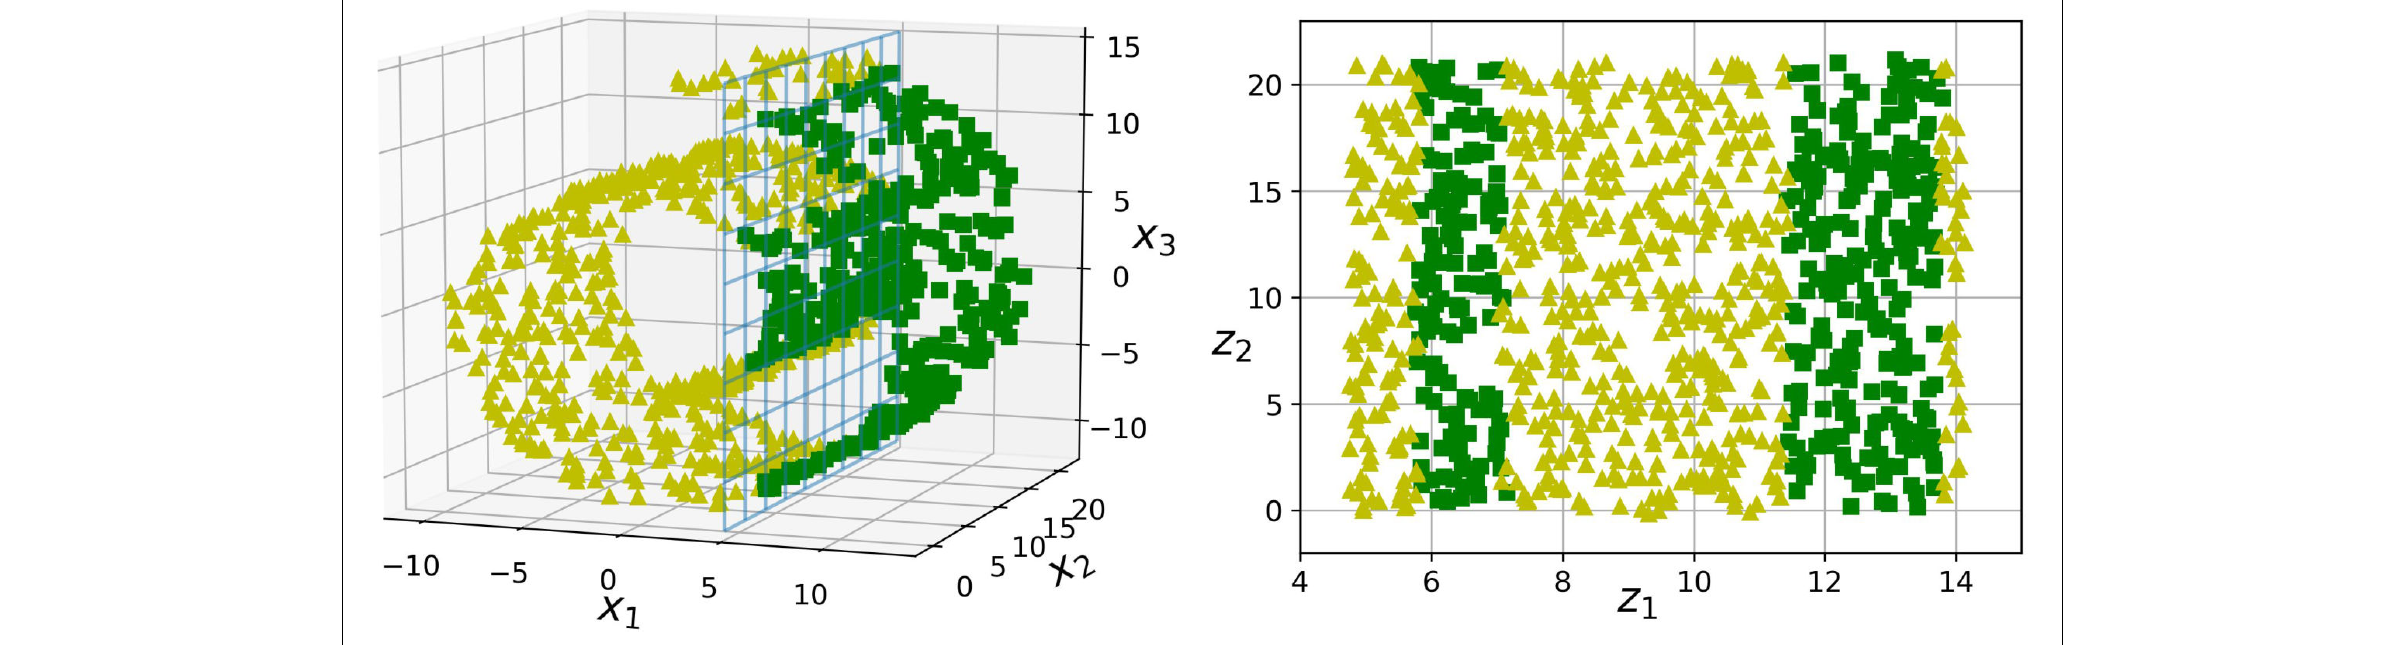

- In short, if you reduce the dimensionality of your training set before training a model, it will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

### PCA

- Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm.
- First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

#### Preserving the Variance

- Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane.

    - Example: a simple 2D dataset, along with three different axes (i.e., one-dimensional hyperplanes).

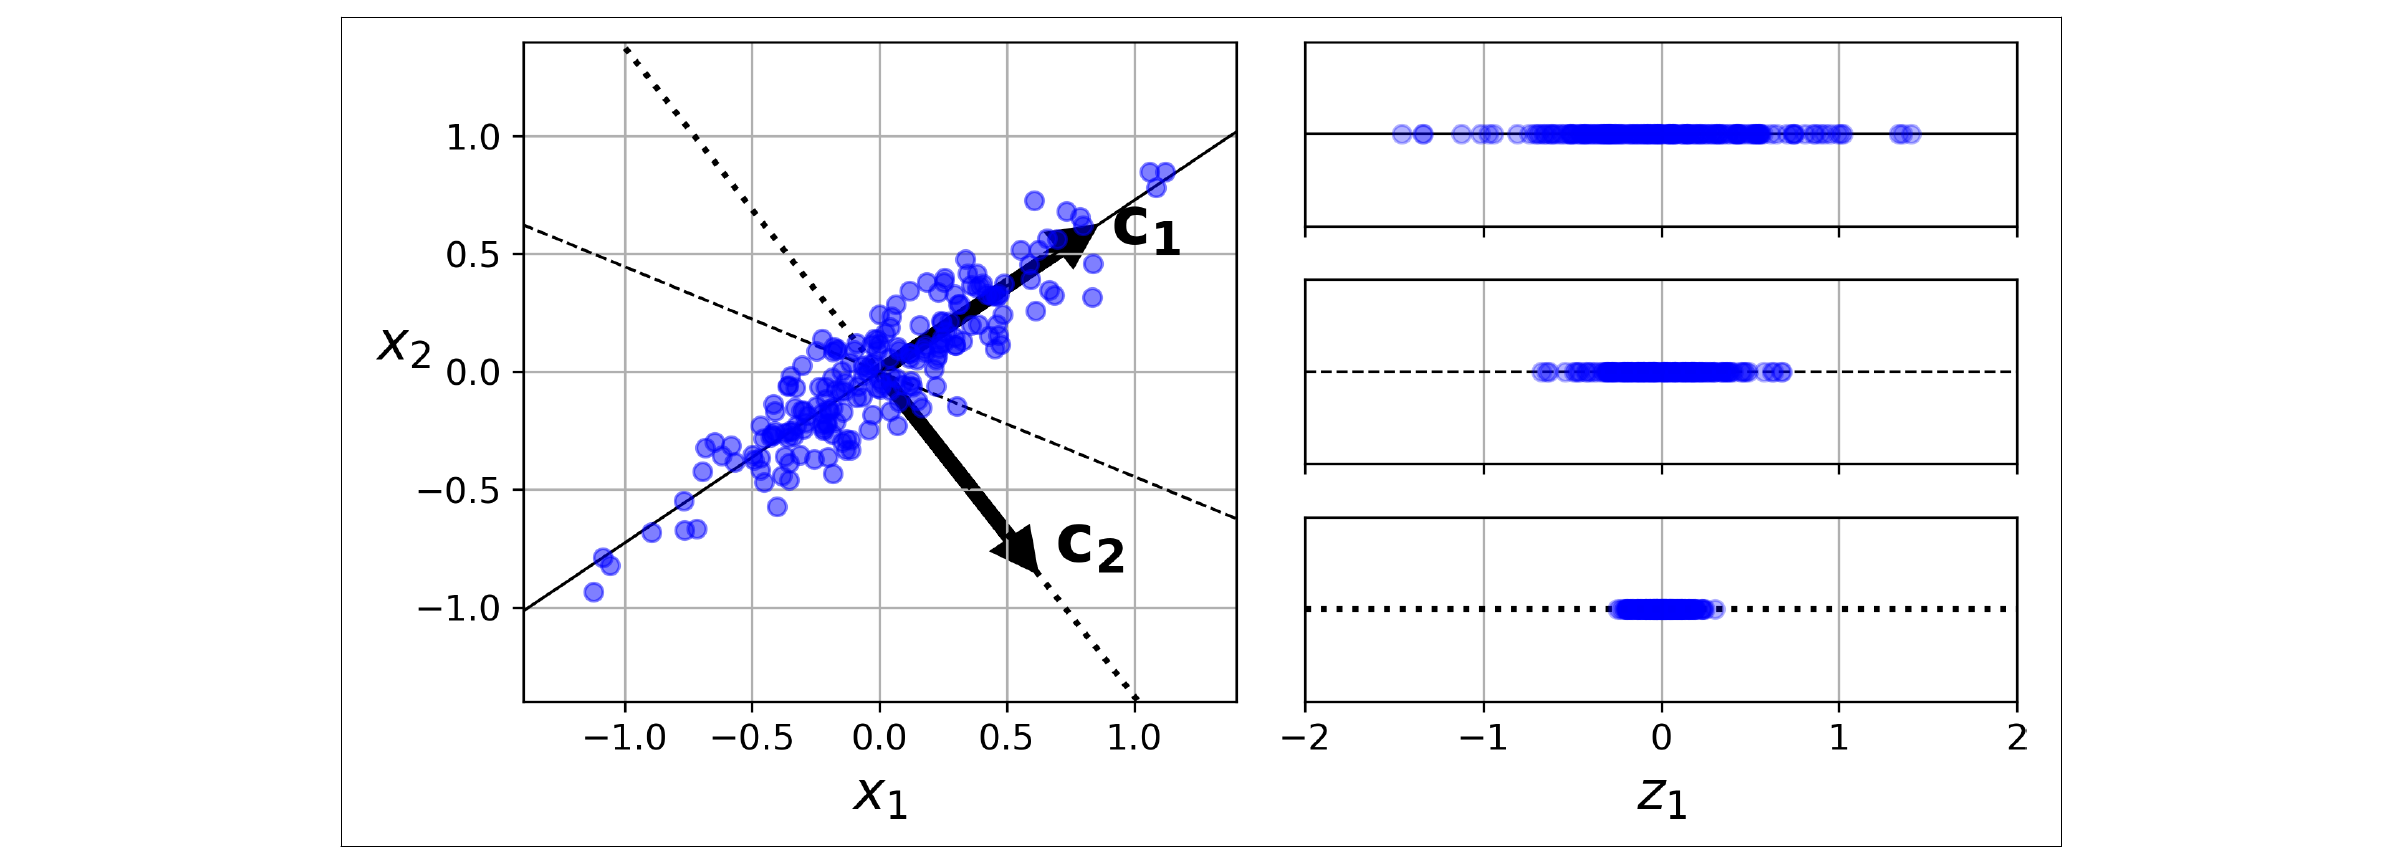

   - On the right is the result of the projection of the dataset onto each of these axes.
   - The projection onto the solid line preserves the maximum variance, while the projection onto the dotted line preserves very little variance, and the projection onto the dashed line preserves an intermediate amount of variance.
    
- It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections.
- Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. 
- This is the simple idea behind PCA.

#### Principal Components

- PCA identifies the axis that accounts for the largest amount of variance in the training set.
- It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of *remaining variance*.
- In this 2D example there is no choice: it is the dotted line. If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and so on.
- The unit vector that defines the ith axis is called the *ith principal component* (PC). 
- There is a standard matrix factorization technique called **Singular Value Decomposition** (SVD) that can decomposes the (centered) training set matrix $\mathbf X$ into the matrix multiplication of three matrices $\mathbf U \mathbf\Sigma \mathbf V^T$, where $\mathbf V$ contains all the principal components that we are looking for.

$$\mathbf X = \mathbf U \mathbf\Sigma \mathbf V^T$$

where:
- $\mathbf U$ and $\mathbf V$ are $m\times p$ and $p\times p$ **orthogonal matrices**, with the columns of $\mathbf U$ spanning the column space of $\mathbf X$, and the columns of $\mathbf V$ spanning the row space.
- $\mathbf \Sigma$ is a $p\times p$ diagonal matrix, with diagonal entries $s_1\geq s_2\geq\ldots\geq s_p\geq 0$ called the **singular values** of $\mathbf X$.

- The sample covariance matrix is given by $\mathbf S=\mathbf X^T\mathbf X/m$. We then have

$$\mathbf X^T\mathbf X= \mathbf V \mathbf \Sigma^2 \mathbf V^T$$,

- Thus, we see that the *principal components* $v_j$ (columns of $\mathbf V$) are the eigenvectors of $\mathbf X^T\mathbf X$.
- The first principal component has the property that $\mathbf z_1=\mathbf X v_1=\mathbf u_1 s_1$ has the largest sample variance amongst the normalized linear combinations of the columns of $\mathbf X$:

$$\mathrm{Var}(\mathbf z_1)= \mathrm{Var}(\mathbf u_1 s_1)=\frac{s_1^2}{m}$$

- Subsequent PCs ($z_j$) have maximum variance $\frac{s_j^2}{m}$, subject to being orthogonal to the earlier ones.
- Finally, the last PC ($z_p$) has minimum variance.

In [3]:
# Build a random 3D dataset

np.random.seed(4)
m = 60    # number of instances
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [4]:
# PCA using SVD

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [5]:
m, n = X.shape

S = np.zeros_like(X_centered)
S[:n, :n] = np.diag(s)
np.allclose(X_centered, U.dot(S).dot(Vt)) # check the decomposition

True

#### Projecting Down to d Dimensions

- Once the principal components are identified, **you can reduce the dimensionality of the dataset down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components**.
- Selecting this hyperplane ensures that the projection will preserve as much variance as possible.
- To project the training set onto the hyperplane, simply compute the matrix multiplication of the training set matrix $\mathbf X$ by the matrix $\mathbf  W_d$, defined as the matrix containing the first $d$ principal component directions (i.e., the matrix composed of the first $d$ columns of $\mathbf V$)

$$\mathbf X_{d-proj}= \mathbf X \mathbf W_d$$

In [6]:
W2 = Vt.T[:, :2]    # slice first two columns of V
X2D = X_centered.dot(W2)
X2D.shape

(60, 2)

#### Using Scikit-Learn

- Scikit-Learn’s `PCA` class implements PCA using SVD decomposition.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D_v2 = pca.fit_transform(X)

In [8]:
X2D[:5]
X2D_v2[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [9]:
# In this example, PCA using Scikit-Learn 
# gives the same projection as the SVD approach, except both axes are flipped:
np.allclose(X2D, -X2D_v2)

True

The `PCA` object gives access to the principal components that it computed:

In [9]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Recover the 3D points projected on the plane (PCA 2D subspace).

In [10]:
X3D_inv = pca.inverse_transform(X2D_v2)

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

In [12]:
np.allclose(X3D_inv, X)

False

We can compute the reconstruction error:

In [13]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

#### Explained Variance Ratio

The explained variance ratio of each principal component, available via the `explained_variance_ratio_` attribute, indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [14]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

- The first dimension explains 84.2% of the variance, while the second explains 14.6%.
- By projecting down to 2D, we lost about 1.1% of the variance.


- Here is how to compute the explained variance ratio using the SVD approach:

In [15]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

#### The right number of dimensions

- Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).


PCA()

Min dimensions 2


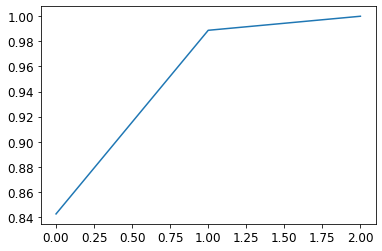

In [16]:
# The following code computes PCA without reducing dimensionality, 
# then computes the minimum number of dimensions required to preserve
# 95% of the training set’s variance:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("Min dimensions", d)

import matplotlib.pyplot as plt

plt.plot(cumsum)

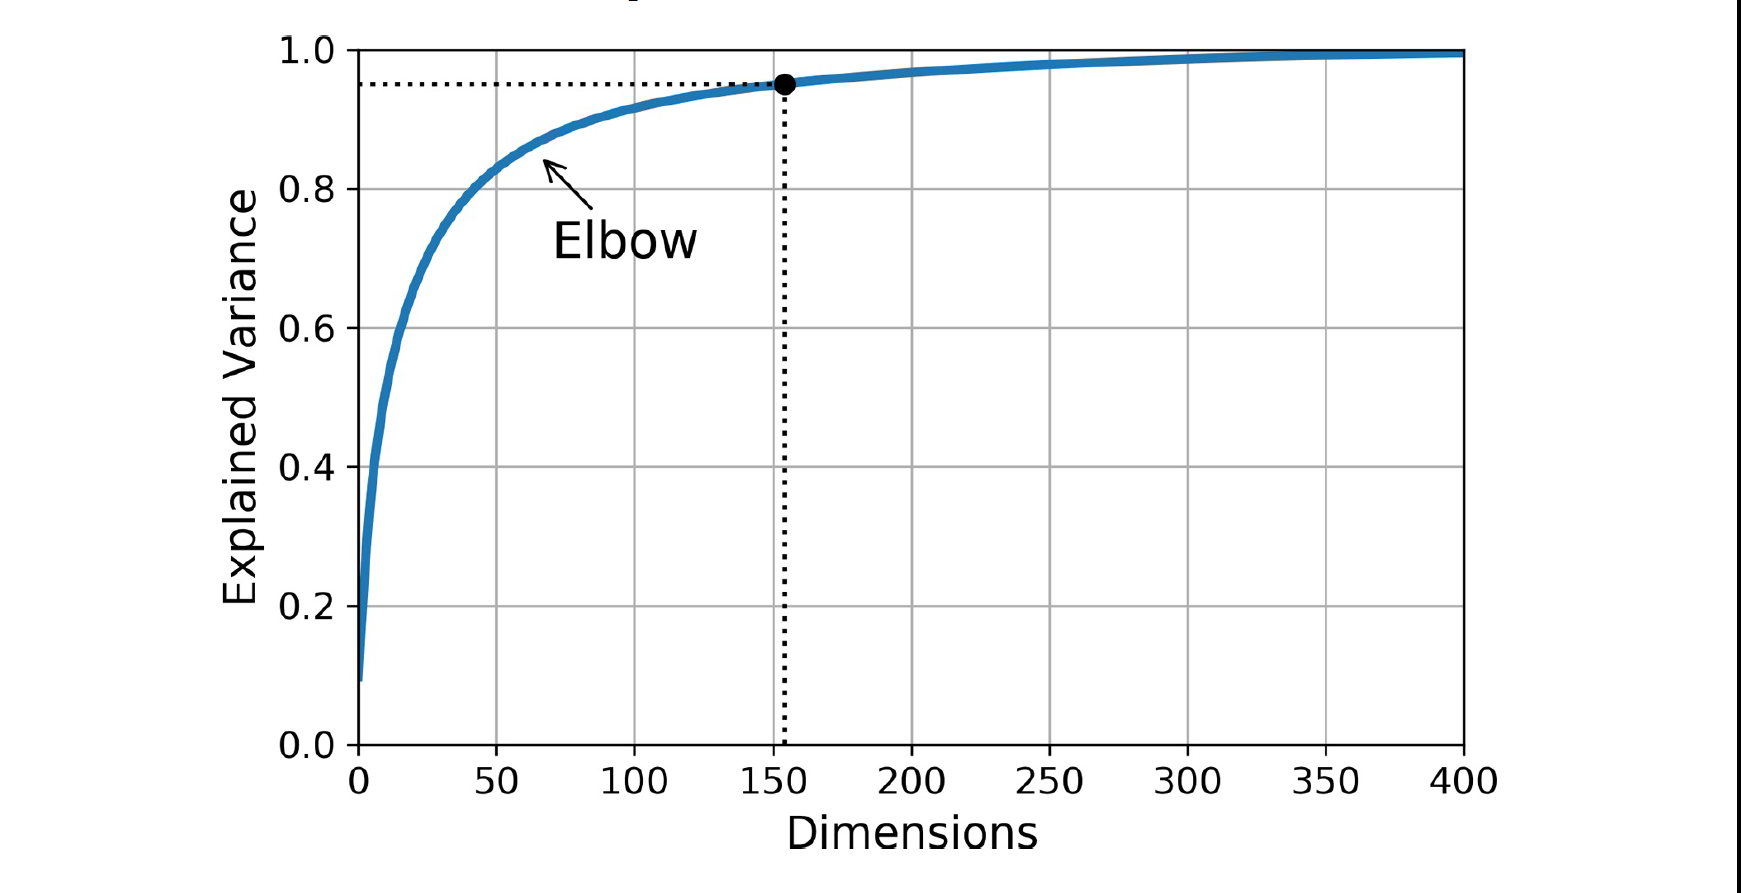

- You could then set `n_components=d` and run PCA again.
- However, there is a much better option: instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:



In [14]:
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X)
pca.explained_variance_

array([0.77830975, 0.1351726 ])

#### Randomized PCA

- If you set the `svd_solver` hyperparameter to "randomized", Scikit-Learn uses a stochastic algorithm called Randomized PCA that quickly finds an approximation of the
first $d$ principal components.
- It is dramatically faster than full SVD when $d$ is much smaller than $n$: 


In [41]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")

- By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the
randomized PCA algorithm if $m$ or $n$ is greater than $500$ and $d$ is less than 80% of $m$ or $n$, or else it uses the full SVD approach.
- If you want to force Scikit-Learn to use full SVD, you can set the svd_solver hyperparameter to "full".

#### Kernel PCA

- The kernel trick is a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression with Support Vector Machines.
- Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space.

- It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction.
- This is called Kernel-PCA (kPCA).
- It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

In [18]:
# the following code uses Scikit-Learn’s KernelPCA class to perform kPCA 
# with an RBF kernel:

from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)


The Swiss roll, reduced to two dimensions using a linear kernel (equivalent to simply using the PCA class), an RBF kernel, and a sigmoid kernel (Logistic).

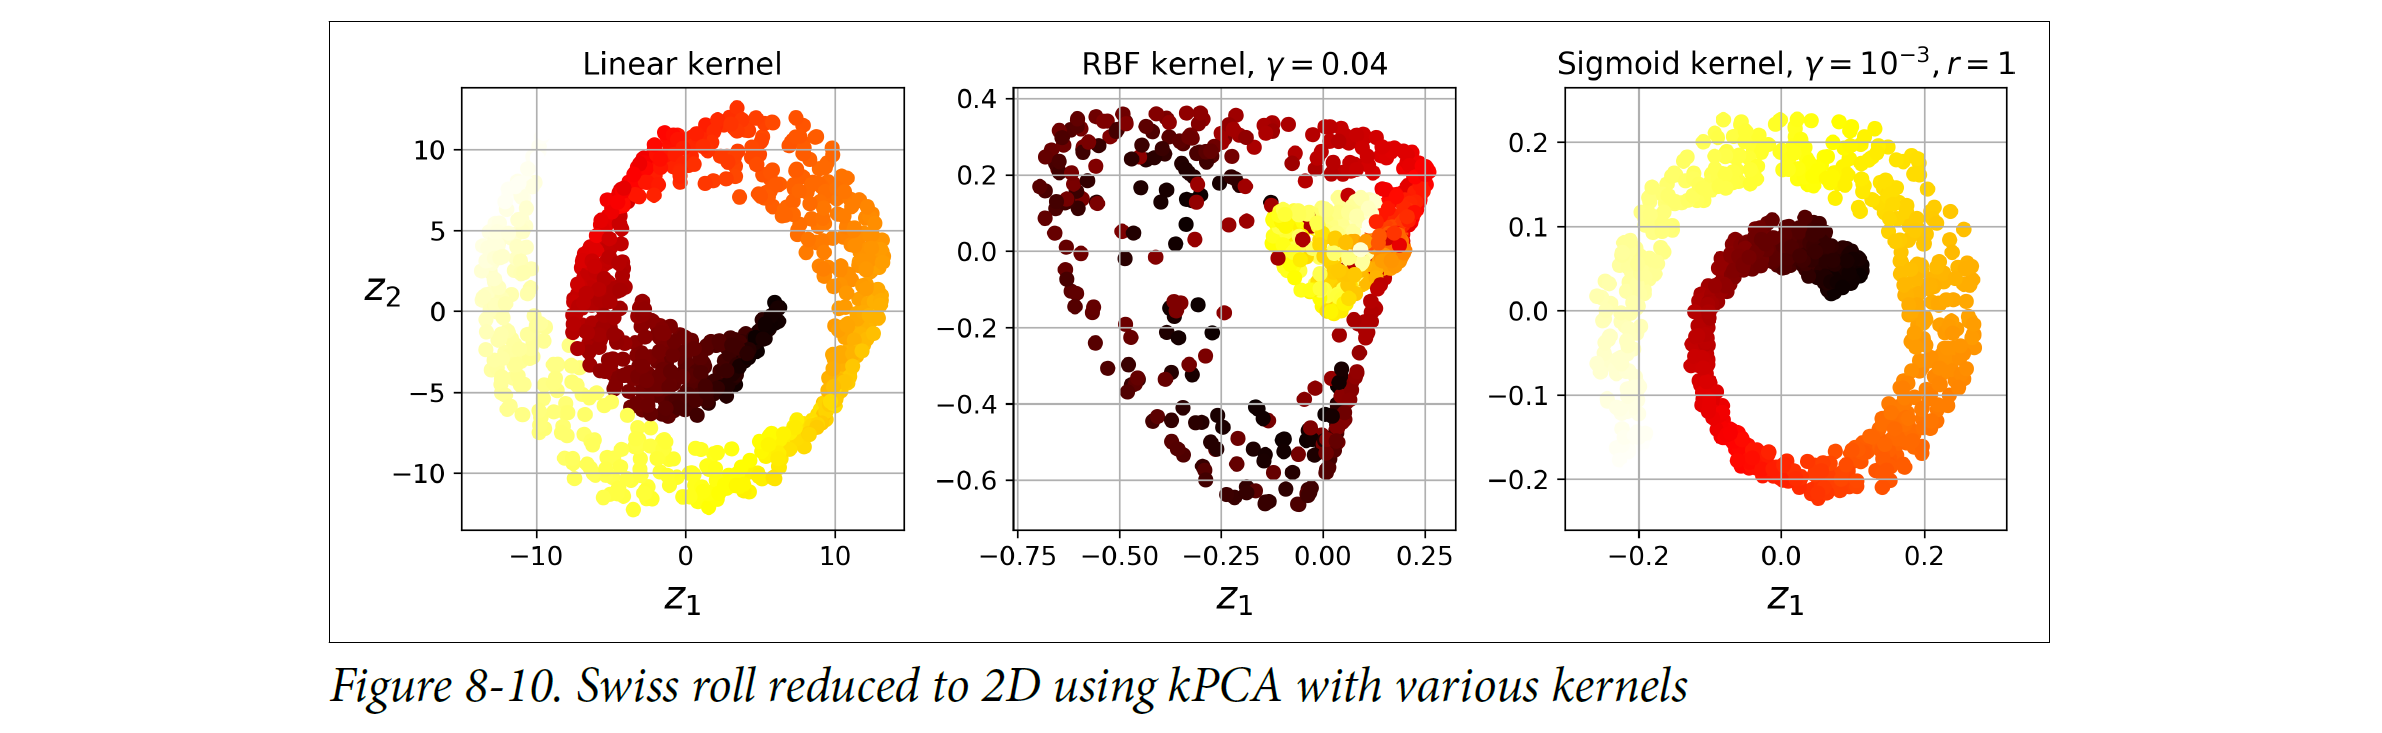

#### Selecting a Kernel and Tuning Hyperparameters

- As kPCA is an **unsupervised learning algorithm**, there is no obvious performance
measure to help you select the best kernel and hyperparameter values.
- However, **dimensionality reduction is often a preparation step for a supervised learning task (e.g., classification), so you can simply use grid search to select the kernel and hyperparameters that lead to the best performance on that task**.


- For example, the following code creates a two-step pipeline, first reducing dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification. Then it uses GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_swiss_roll

#data
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

clf = Pipeline([("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression(solver='lbfgs'))])

param_grid = [{"kpca__gamma": np.linspace(0.03, 0.05, 10),
               "kpca__kernel": ["rbf", "sigmoid"],
              "log_reg__C": [0.1, 0.2, 0.3]},
             {"kpca__degree": [2, 3],
               "kpca__kernel": ["poly"],
             "log_reg__C": [0.1, 0.2, 0.3]}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

# The best kernel and hyperparameters:
print(grid_search.best_params_)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']},
                         {'kpca__degree': [2, 3], 'kpca__kernel': ['poly']}])

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


### Locally Linear Embedding (LLE)

- LLE is another very powerful nonlinear dimensionality reduction (NLDR) technique.
- It is a Manifold Learning technique that does not rely on projections like the previous algorithms.
- In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved.
- This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

In [20]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

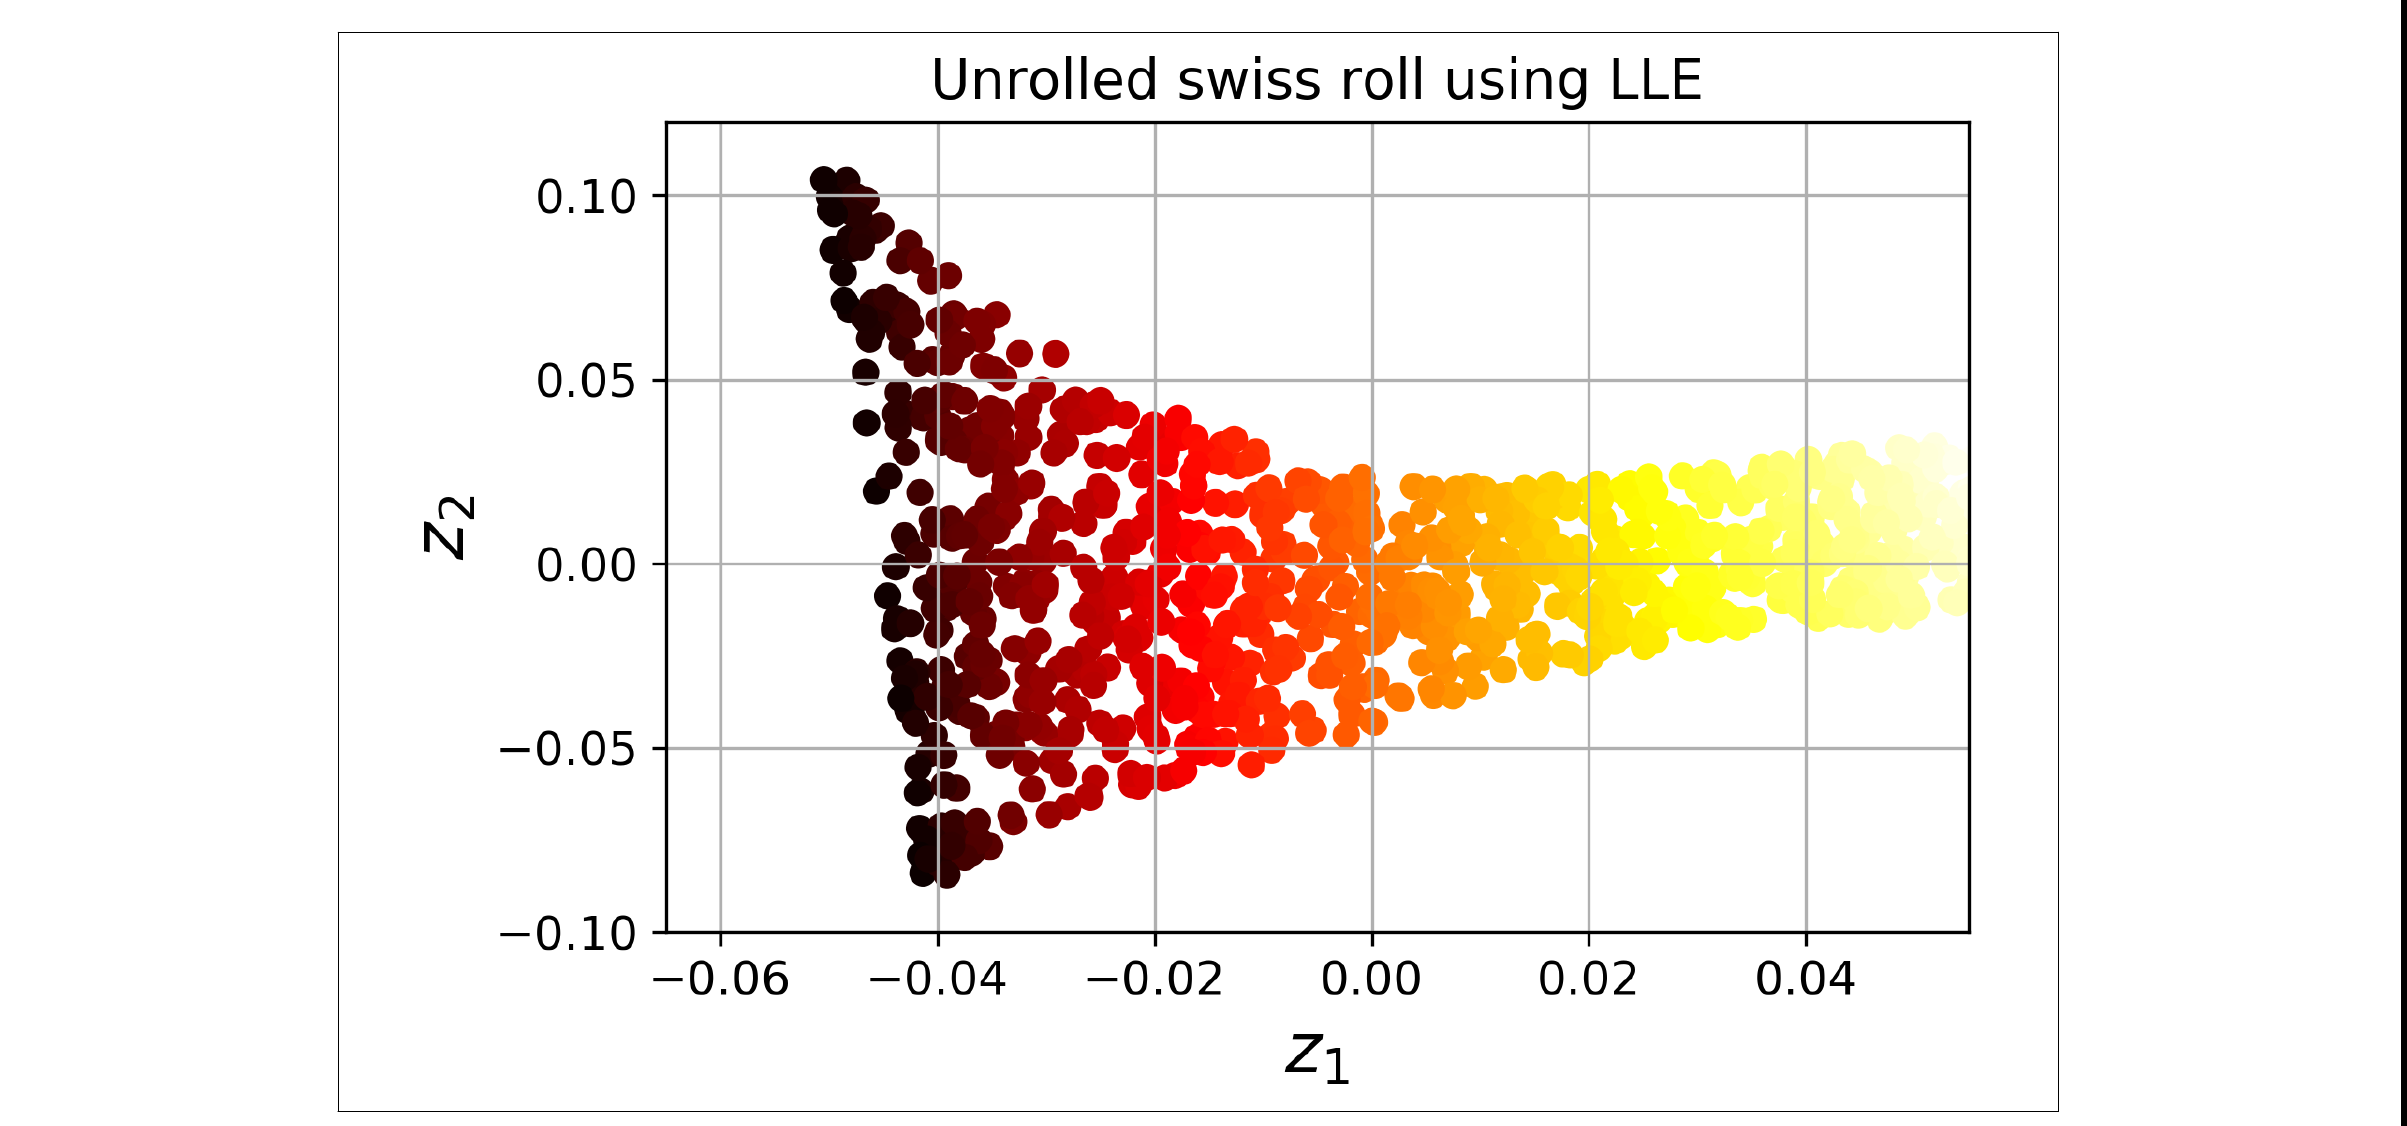

- Most of the applications of Machine Learning today are based on supervised learning 
- But the vast majority of the available data is actually unlabeled: we have the input features $X$, but we do not have the labels $y$.


- Common unsupervised learning tasks:
    - Dimensionality Reduction: take a large number of features and compress them into a smaller set, losing as little informational content as possible in the process.
    - Clustering: the goal is to group similar instances together into clusters.
    - Anomaly detection: the objective is to learn what “normal” data looks like, and use this to detect abnormal instances, such as defective items on a production line or a new trend in a time series.
    - Density estimation: this is the task of estimating the probability density function (PDF) of the random process that generated the dataset.
    

## Clustering

- Clustering is the task of identifying similar instances and assigning them to clusters, i.e., groups of similar instances. 
- Just like in classification, each instance gets assigned to a group. However, this is an unsupervised task since we do not know what the group's label is.

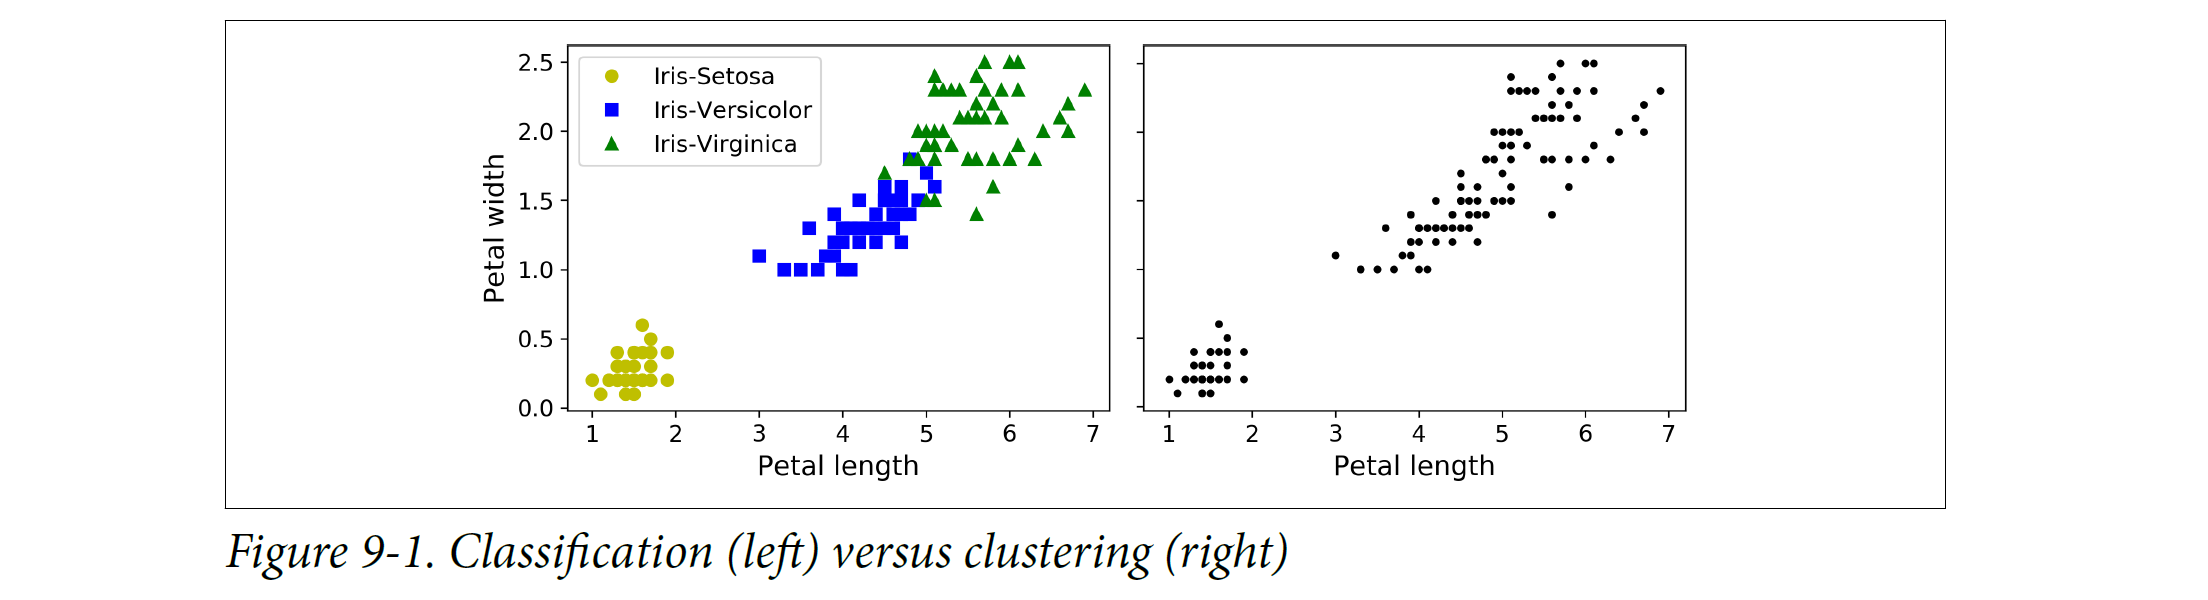

- Clustering applications:
    - Customer segmentation: you can cluster your customers based on their purchases, their activity on your website, and so on. This can be useful in *recommender systems* to suggest content that other users in the same cluster enjoyed.
    - Data analysis:  it is often easier to analyze clusters separately.
    - Dimensionality reduction: once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector x can then be replaced with the vector of its cluster affinities.
    - Anomaly/outlier detection: any instance that has a low affinity to all the clusters is likely to be an anomaly.
    - Semi-supervised learning: if you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This can greatly increase the amount of labels available for a subsequent supervised learning algorithm, and thus improve its performance.
    

- There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters.
    - Some algorithms look for instances centered around a particular point, called a *centroid*. Others look for continuous regions of densely packed instances: these clusters can take on any shape.

## K-Means

Consider an unlabeled dataset:

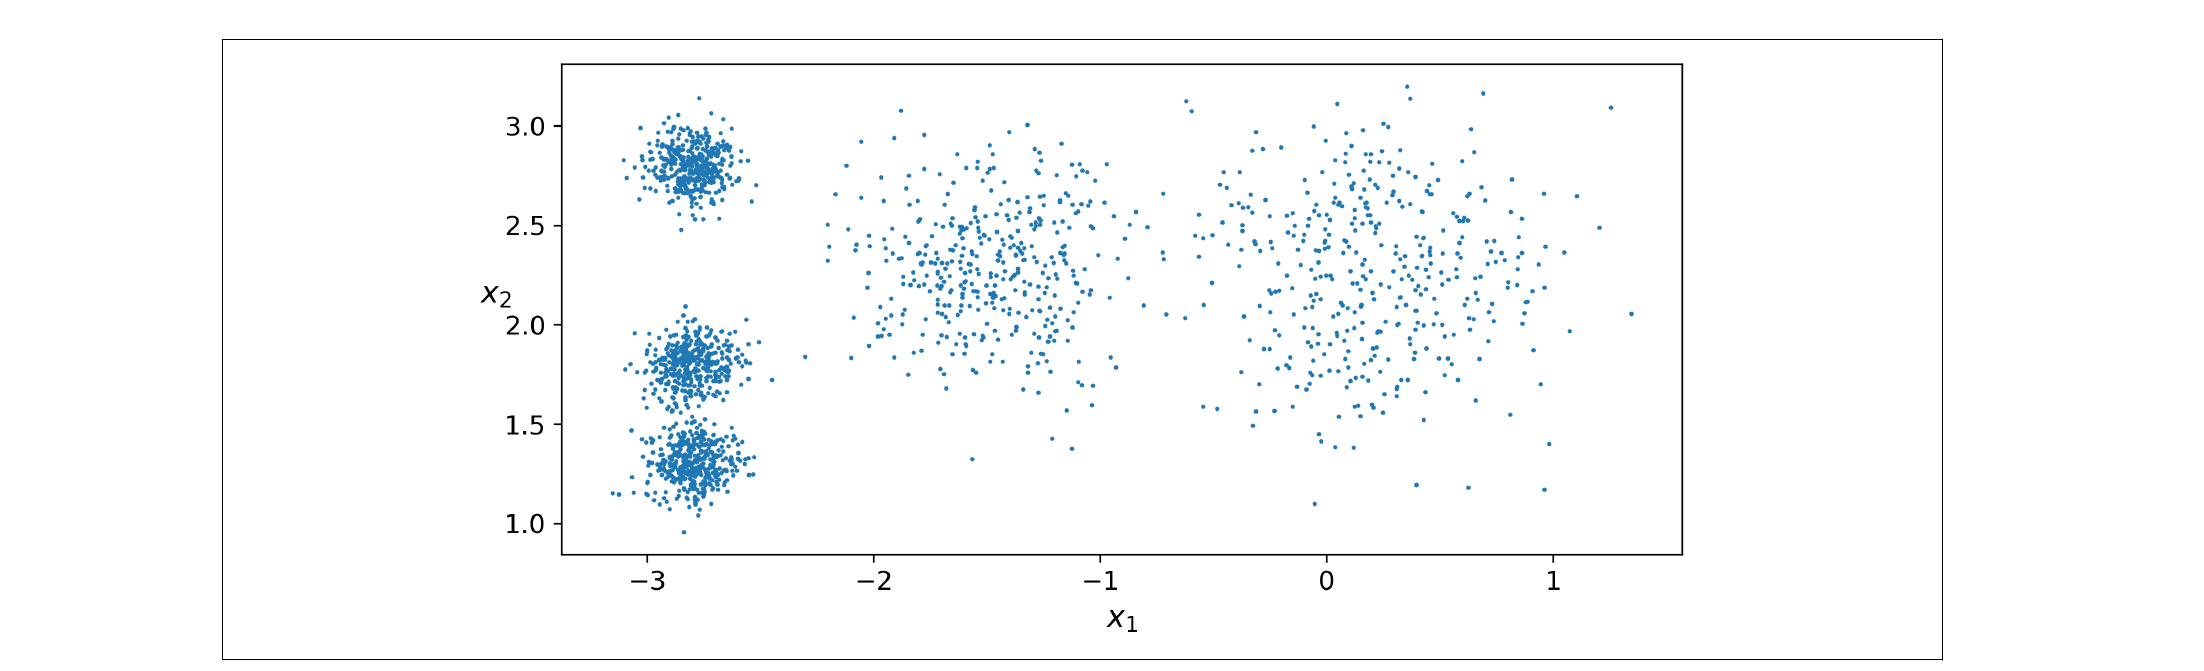

- You can clearly see 5 blobs of instances.
- The K-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations

In [15]:
# data
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [16]:
from sklearn.cluster import KMeans

# Note that you have to specify the number of clusters k that the algorithm must find.
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [17]:
# Each instance was assigned to one of the 5 clusters:
y_pred
# the label of an instance is the index of the cluster that instance gets assigned to
y_pred is kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

True

In [18]:
# And the following 5 centroids (i.e., cluster centers) were estimated:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [25]:
# we can predict the labels of new instances:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

### Decision Boundaries 

Let's plot the model's decision boundaries. This gives us a Voronoi diagram:

In [26]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Filled Colors
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    # Contour line
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

<Figure size 576x288 with 0 Axes>

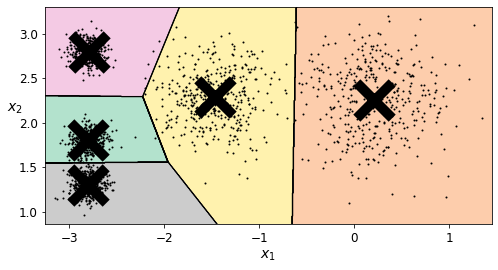

In [27]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Soft Clustering

Rather than arbitrarily choosing the closest cluster for each instance, which is called *hard clustering*, it might be better measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

In [29]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

This a form of *dimensionality reduction*

### The K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:

1. First initialize 𝑘 centroids randomly:
    𝑘 distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.

2. Repeat until convergence (i.e., until the centroids stop moving):
    - Assign each instance to the closest centroid.
    - Update the centroids to be the mean of the instances that are assigned to them.


- The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random", n_init=1, algorithm="full"`.

In [28]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=1, n_clusters=5, n_init=1,
       random_state=1)

KMeans(algorithm='full', init='random', max_iter=2, n_clusters=5, n_init=1,
       random_state=1)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

And let's plot this:

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$x_2$')

Text(0.5, 1.0, 'Update the centroids (initially randomly)')

<AxesSubplot:>

Text(0.5, 1.0, 'Label the instances')

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

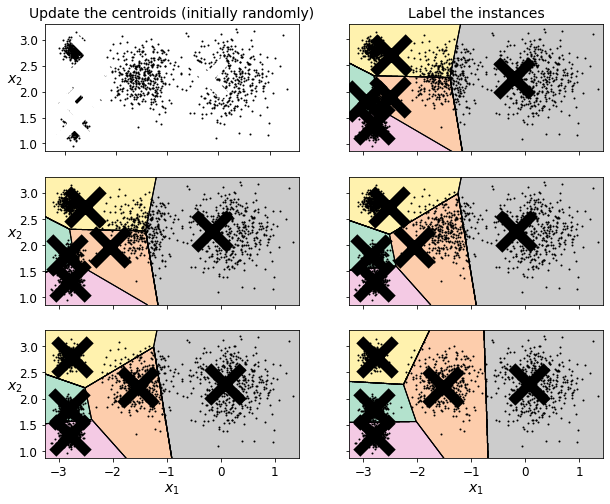

In [29]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### K-means instability 

- Although the algorithm is guaranteed to converge, it may not converge to the
right solution (i.e., it may converge to a local optimum): whether it does or not
depends on the centroid initialization

- In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

- However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:


In [13]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

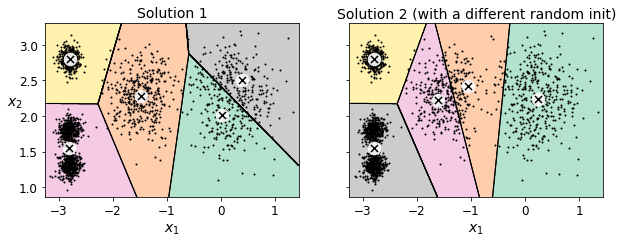

In [14]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")


plt.show()

### Centroid initialization methods

1. If you happen to know approximately where the centroids should be (e.g., if you
ran another clustering algorithm earlier), then you can set the `init`
hyperparameter to a NumPy array containing the list of centroids

In [32]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

2. Run the algorithm multiple times with different random initializations and keep the best solution. 

    - The number of random initializations is controlled by the `n_init` hyperparameter: by default, it is equal to 10, which means that the whole algorithm described earlier runs 10 times when you call `fit()`, and Scikit-Learn keeps the best solution.
    
    - The best solution is based on the **inertia** performance metric, which measures the **the squared distance between each instance and its centroid**. 

In [19]:
kmeans.fit(X)
print("INERTIA: {:.2f}".format(kmeans.inertia_))

KMeans(n_clusters=5, random_state=42)

INERTIA: 211.60


In [34]:
# Inertia = SUM squared distances between each instance and its closest centroid:

X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

The `score()` method returns the **negative inertia**. Why negative? Well, it is because a predictor's score() method must always respect the "great is better" rule.

In [35]:
kmeans.score(X)

-211.59853725816856

### K-Means++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):

In [16]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Accelerated k-means

The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).

To use Elkan's variant of K-Means, just set algorithm="elkan". Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data.

In [28]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

60.3 ms ± 3.36 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [29]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

73.6 ms ± 3.3 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini-batch k-means

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches (see [this paper](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [30]:
from sklearn.cluster import MiniBatchKMeans

In [31]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [32]:
minibatch_kmeans.inertia_

211.93186531476775

Although the Mini-batch K-Means algorithm is much faster than the regular KMeans
algorithm, its inertia is generally slightly worse, especially as the number
of clusters increases.

###  Finding the optimal number of clusters

So far, we have set the number of clusters $k$ to 5 because it was obvious by
looking at the data that this was the correct number of clusters. 

- In general, it will not be so easy to know how to set $k$, and the result might be quite bad if you set it to the wrong value.

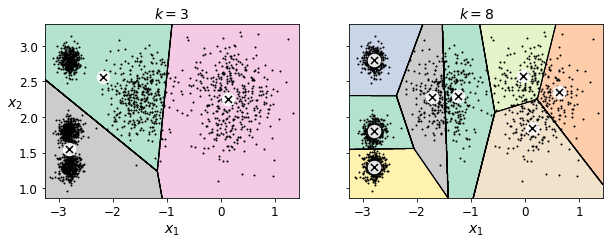

In [36]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

plt.show()

Ouch, these two models don't look great. What about their inertias?


In [37]:
kmeans_k3.inertia_

653.2167190021553

In [38]:
kmeans_k8.inertia_

119.11983416102879

- We cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$.

- Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

In [39]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

<Figure size 576x252 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Inertia')

Text(0.55, 0.55, 'Elbow')

[1, 8.5, 0, 1300]

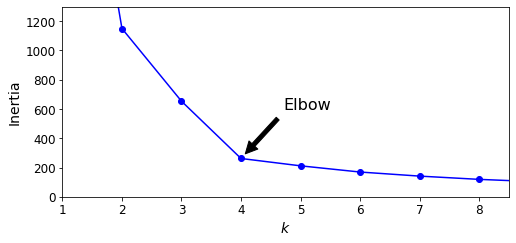

In [40]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

A more precise approach (but also more computationally expensive) is to
use the **silhouette score**, which is the mean silhouette coefficient over all the
instances.

- An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster).

- The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$:

In [17]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [42]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

<Figure size 576x216 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Silhouette score')

[1.8, 8.5, 0.55, 0.7]

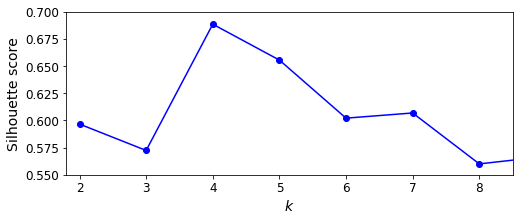

In [43]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a **silhouette diagram**:

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    # This gets all the coefficients (not just the mean)
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    # score = mean coeff
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### Limits of K-Means

Despite its many merits, most notably being **fast and scalable**, K-Means is not
perfect.

- It is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle.
- Moreover, K-Means does not behave very well when the **clusters have varying sizes, different densities, or nonspherical shapes**.

In [44]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

# MIX of two populations
X = np.r_[X1, X2]
y = np.r_[y1, y2]

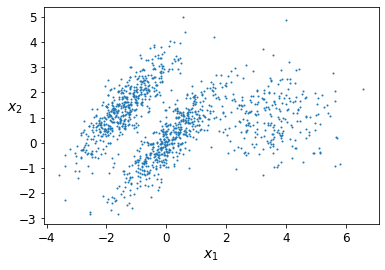

In [45]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plot_clusters(X)

In [46]:
kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True,
    init=array([[-1.5,  2.5],
       [ 0.5,  0. ],
       [ 4. ,  0. ]]),
    max_iter=300, n_clusters=3, n_init=1, n_jobs=None,
    precompute_distances='auto', random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

<Figure size 720x230.4 with 0 Axes>

Text(0.5, 1.0, 'Inertia = 2242.1')

Text(0.5, 1.0, 'Inertia = 2179.5')

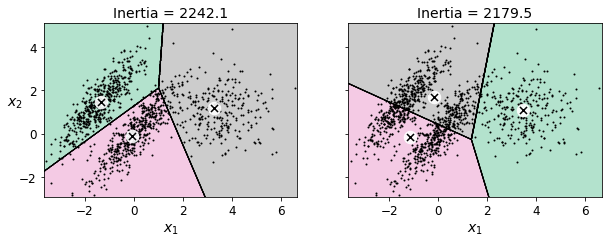

In [47]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

- Neither of these solutions is any good.
- The solution on the left is better, but it still chops off 25% of the middle cluster and assigns it to the cluster on the right.
- The solution on the right is just terrible, even though its inertia is lower!
- So, depending on the data, different clustering algorithms may perform better. On these types of elliptical clusters, *Gaussian mixture models* work great.

#### It is important to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly.

Now let's look at a bunch of applications

#### 1. Using Clustering for Image Segmentation

Image segmentation is the task of partitioning an image into multiple segments.

- In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment.
- In instance segmentation, all pixels that are part of the same
individual object are assigned to the same segment.
- Here, we are going to do
something much simpler: color segmentation. We will simply assign pixels to
the same segment if they have a similar color. In some applications, this may be
sufficient.

In [48]:
from matplotlib.image import imread
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
image.shape

(533, 800, 3)

The image is represented as a 3D array. The first dimension’s size is the height;
the second is the width; and the third is the number of color channels, in this
case red, green, and blue (RGB).

In [49]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)


In [50]:
kmeans.labels_.shape

(426400,)

In [51]:
kmeans.cluster_centers_   # RGB

array([[0.98326355, 0.9351094 , 0.02573261],
       [0.02240384, 0.11051449, 0.00579273],
       [0.21762744, 0.38532948, 0.0572455 ],
       [0.7599995 , 0.20910062, 0.04433527],
       [0.09915568, 0.25297862, 0.01673489],
       [0.6116277 , 0.6297308 , 0.38689855],
       [0.37087163, 0.52249783, 0.156312  ],
       [0.8831067 , 0.72412664, 0.03478576]], dtype=float32)

In [52]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    # This creates a segmented image (broadcasting is being used)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

#### 2. Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular
as a preprocessing step before a supervised learning algorithm.

- As an example of using clustering for dimensionality reduction, let’s tackle the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images:

In [53]:
from sklearn.datasets import load_digits

In [54]:
X_digits, y_digits = load_digits(return_X_y=True)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr",
                             solver="lbfgs",
                             max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
log_reg.score(X_test, y_test)

0.9688888888888889

Okay, that's our baseline: 96.89% accuracy.

- Let's see if we can do better by using K-Means as a preprocessing step.
- We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [58]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr",
                                   solver="lbfgs",
                                   max_iter=5000,
                                   random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [59]:
pipeline.score(X_test, y_test)

0.9777777777777777

In [60]:
1 - (1 - 0.977777) / (1 - 0.968888)

0.28570969400874346

We reduced the error rate by over 28%! 

* But we chose the number of clusters 𝑘 completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for 𝑘 is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of 𝑘 is simply the one that results in the best classification performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

[CV] ............................ kmeans__n_clusters=41, total=   5.7s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   5.0s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   5.4s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   5.3s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   5.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   5.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   5.0s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

KeyboardInterrupt: 

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.score(X_test, y_test)

#### 3. Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have
plenty of unlabeled instances and very few labeled instances. 

- Let’s train a Logistic Regression model on a sample of 50 labeled instances from the digits:

In [63]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr",
                             solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.8333333333333334

First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [64]:
k = 50 # same as labeled

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)   # distances to 50 centroids

# ids of instances closest to centroids
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

# representative digits = image closest to centroid
X_representative_digits = X_train[representative_digit_idx]

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8),
               cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [66]:
# These 50 can be labeled by hand
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [67]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs",
                             max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.9222222222222223

- We jumped from 83.3\% accuracy to 92.2\%, although we are still only training the model on 50 instances.

- Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [68]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [69]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs",
                             max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.9333333333333333

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 20th percentile closest to the centroid:

In [70]:
percentile_closest = 20

# keep distance to own cluster centroid only
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    # indexes of instances in cluster
    in_cluster = (kmeans.labels_ == i)
    # distances within cluster
    cluster_dist = X_cluster_dist[in_cluster]
    # calculate cutoff distance
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    # mark instances beyond cutoff
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs",
                             max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

0.94

- With just 50 labeled instances (just 5 examples per class on average!), we got 94% performance, which is pretty close to the performance of logistic regression on the fully labeled digits dataset (which was 96.9%)

- This is because the propagated labels are actually pretty good: their accuracy is very close to 99%:

In [87]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

## DBSCAN


This algorithm defines **clusters as continuous regions of high density**.

1. For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ (epsilon) from it.
    
    This region is called the instance’s **ε-neighborhood**.
    

2. If an instance has at least `min_samples` instances in its ε-neighborhood (including itself), then it is considered a **core instance**.
    
    In other words, core instances are those that are located in dense regions.
    
    
3. All instances in the neighborhood of a core instance belong to the same **cluster**. 

    This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
    
    
4. Any instance that is **not** a core instance and does **not** have one in its neighborhood is considered an **anomaly**.

- This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions.

In [90]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [91]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [92]:
# Resulting clusters

dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

- Instances labeled $-1$ are considered **anomalies** 

In [95]:
# List of clusters 

np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [93]:
# Core instance indexes

dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [94]:
# Core instance components

dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [96]:
# Varying epsilon can have a huge effect

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [100]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)   # False by default
    core_mask[dbscan.core_sample_indices_] = True           # Mark core instances
    
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    # plot scatter of core instances
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='*', s=20)

    # scatter of anomalies
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    
    # scatter of non-core instances
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".", s=100)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples),
              fontsize=14)

    

<Figure size 648x230.4 with 0 Axes>

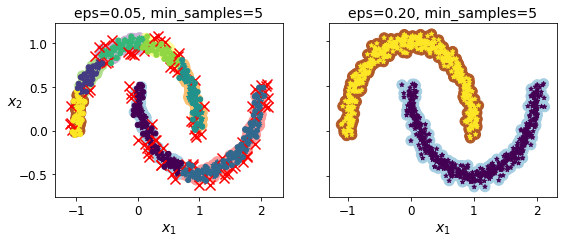

In [101]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=100, show_ylabels=False)

plt.show()


In [102]:
# clearly the second option is better
dbscan = dbscan2

* DBSCAN does not have a `predict()` method.
* Instead, users are expected to select a classification method

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

array([1, 0, 1, 0], dtype=int64)

In [104]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

<Figure size 432x216 with 0 Axes>

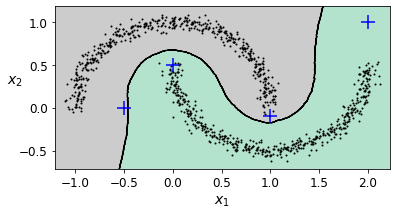

In [105]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

- It might make sense to mark as anomalies new instances that are far from clusters

In [106]:
y_dist, y_pred_idx = knn.kneighbors(X_new,
                                    n_neighbors=1)   # closest neighbor distance/id
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]  # assigned cluster
y_pred[y_dist > 0.2] = -1     # mark as anomaly if distance too large
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

## Other Clustering Algorithms

### Spectral Clustering

This algorithm takes a similarity matrix between the instances and creates a
low-dimensional embedding from it (i.e., it reduces its dimensionality), then
it uses another clustering algorithm in this low-dimensional space (Scikit-
Learn’s implementation uses K-Means.)

In [107]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=100, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=42)

In [108]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=42)

<Figure size 648x230.4 with 0 Axes>

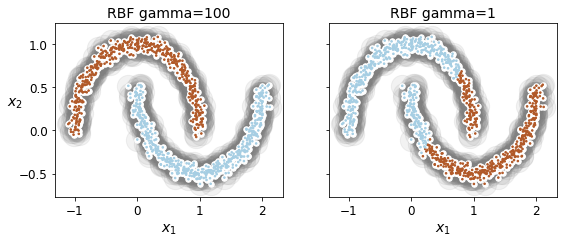

In [110]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o',
                s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o',
                s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.',
                s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)


plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=500, alpha=0.1, show_ylabels=False)

plt.show()


### Agglomerative Clustering

- A hierarchy of clusters is built from the bottom up. Think of many tiny
bubbles floating on water and gradually attaching to each other until there’s
one big group of bubbles.

- Similarly, at each iteration, agglomerative clustering connects the nearest pair of clusters (starting with individual instances).

- If you drew a tree with a branch for every pair of clusters that merged, you would get a binary tree of clusters, where the leaves are the individual instances

In [111]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [112]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [113]:
learned_parameters(agg)

['children_', 'labels_', 'n_components_', 'n_leaves_']

In [114]:
agg.children_


array([[0, 1],
       [2, 3],
       [4, 5]])

## Gaussian Mixtures

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the
instances were generated from a **mixture of several Gaussian distributions** whose
parameters are unknown.


All the instances generated from a single Gaussian
distribution form a cluster that typically looks like an ellipsoid. Each cluster can
have a different ellipsoidal shape, size, density, and orientation.

* There are several GMM variants. In the simplest variant, implemented in the
`GaussianMixture` class, you must know in advance the number $k$ of Gaussian
distributions.

- The dataset $\mathbf{X}$ is assumed to have been generated through the
following probabilistic process:

    1. For each instance, a cluster is picked randomly from among $k$ clusters.
    
    2. The probability of choosing the $j$-th cluster is defined by the cluster’s weight, $\phi^j$. The index of the cluster chosen for the $i$-th instance is noted $z^{(i)}$.
    
    3. If $z^{(i)}=j$, meaning the $i$-th instance has been assigned to the $j$-th cluster, the location $\mathbf{x}^{(i)}$ of this instance is sampled randomly from the Gaussian distribution with mean $\mathbf{\mu}^{j}$ and covariance matrix $\mathbf{\Sigma}^j$.

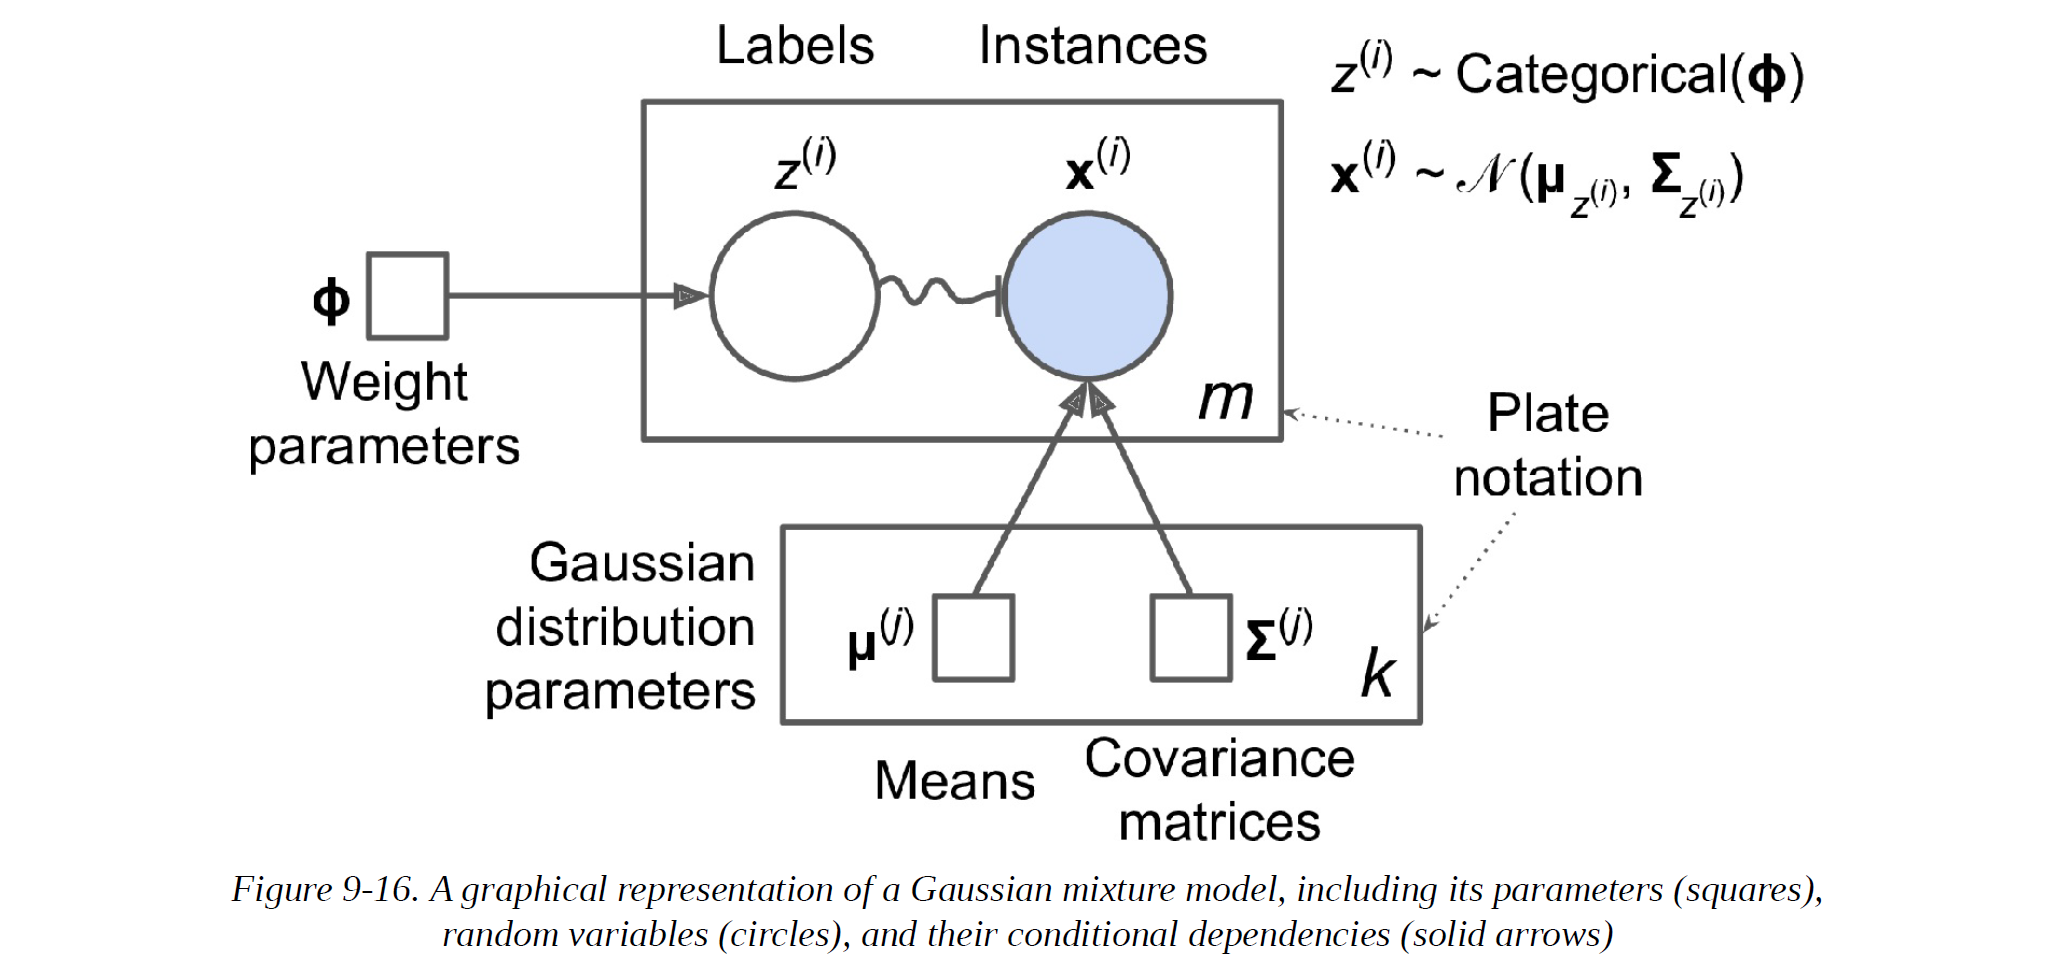

In [115]:
# Given the dataset X, estimate the weights and all the distribution parameters

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
# scale
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
# shift
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [116]:
from sklearn.mixture import GaussianMixture

# k is set by the n_components keyword parameter
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Let’s look at the parameters that the algorithm estimated:

In [117]:
gm.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [118]:
gm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [119]:
gm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

This class relies on the **Expectation-Maximization (EM)** algorithm.

- It has many similarities with the K-Means algorithm: it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the *expectation step*) and then updating the clusters (this is called the *maximization step*).

- EM is a kind of generalization of K-Means that not only finds the cluster centers (μ), but also their size, shape, and orientation (Σ), as well as their relative weights (ϕ).

- Unlike K-Means, though, EM uses **soft cluster assignments**, not hard assignments. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters).

- Then, during the maximization step, each cluster is updated using **all** the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster.

Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set `n_init` to 10.


In [120]:
# Convergence stats
gm.converged_
gm.n_iter_

True

4

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [121]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

In [122]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

This is a generative model, so you can sample new instances from it (and get their labels):

In [123]:
X_new, y_new = gm.sample(6)
X_new
y_new

array([[ 2.95400315,  2.63680992],
       [-1.16654575,  1.62792705],
       [-1.39477712, -1.48511338],
       [ 0.27221525,  0.690366  ],
       [ 0.54095936,  0.48591934],
       [ 0.38064009, -0.56240465]])

array([0, 1, 2, 2, 2, 2])

Notice that they are sorted by cluster.


It is also possible to estimate the density of the model at any given location. This
is achieved using the `score_samples()` method: for each instance it is given,
this method estimates the log of the probability density function (PDF) at that
location. 

In [124]:
gm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [125]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    # Calculate -log densities
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),   # normalize using log normal
                 levels=np.logspace(0, 2, 12))        # 12 levels
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])   # get cluster
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

<Figure size 576x288 with 0 Axes>

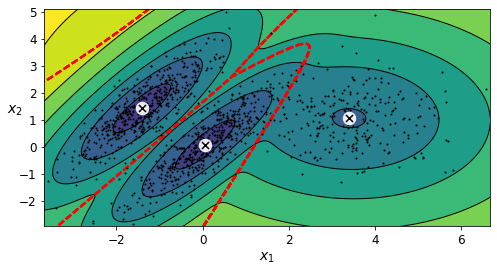

In [126]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

- When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution.

- You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn.

- One way to do this is to **limit the range of shapes and orientations** that the clusters can have. This can be achieved by **imposing constraints on the covariance matrices**.

- To do this, set the `covariance_type` hyperparameter to one of the following values:

    `"spherical"`: All clusters must be spherical, but they can have different diameters (i.e., different variances).

    `"diag"`: Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).

    `"tied"`: All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix).

- By default, covariance_type is equal to `"full"`, which means that each cluster can take on any shape, size, and orientation

In [128]:
gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=3, n_init=10,
        precisions_init=None, random_state=42, reg_covar=1e-06, tol=0.001,
        verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

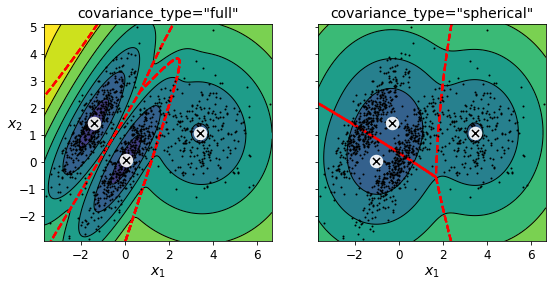

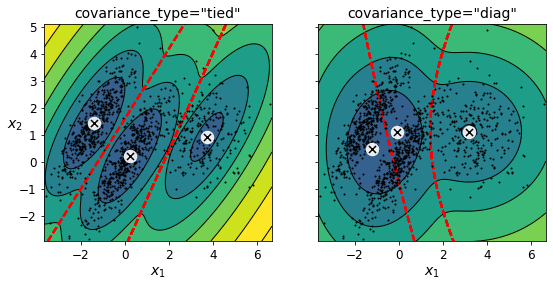

In [130]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

    
compare_gaussian_mixtures(gm_full, gm_spherical, X)    
compare_gaussian_mixtures(gm_tied, gm_diag, X)
plt.show()

- The computational complexity of training a GaussianMixture model depends on the number of instances $m$, the number of dimensions $n$, the number of clusters $k$, and the constraints on the covariance matrices.

- If `covariance_type` is "spherical" or "diag", it is O($kmn$), assuming the data has a clustering structure.

- If `covariance_type` is "tied" or "full", it is O($kmn^2 + kn^3$), so it will not scale to large numbers of features.

### Anomaly Detection Using Gaussian Mixtures

- Anomaly detection (a.k.a. outlier detection) is the task of detecting instances that deviate strongly from the norm.

- Applications: fraud detection, detecting defective products in manufacturing, removing outliers from a dataset before training another model.

- Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly.

- You must define what density threshold you want to use.

In [143]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 1)   # 1% anomalies
anomalies = X[densities < density_threshold]

<Figure size 576x288 with 0 Axes>

(-2.9486047751812894, 5.1)

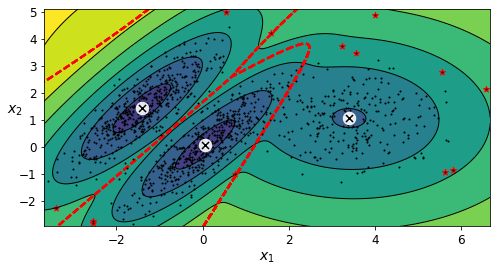

In [144]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*', s=40)
plt.ylim(top=5.1)

plt.show()

- A closely related task is **novelty detection**: it differs from anomaly detection in that the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption.

- Gaussian mixture models try to fit all the data, including the outliers, so if you have too many of them, this will bias the model’s view of “normality,” and some outliers may wrongly be considered as normal. If this happens, you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned-up dataset.

- Another approach is to use robust covariance estimation methods (see the `EllipticEnvelope` class).

### Selecting the Number of Clusters

- With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters.

- With Gaussian mixtures, it is **not possible** to use these metrics because they are not reliable when the clusters are not spherical or have different sizes.

- Instead, you can try to find the **model that minimizes a theoretical information criterion**, such as the Bayesian information criterion (**BIC**) or the Akaike information criterion (**AIC**).

    ${BIC} = {\log(m)p - 2\log({\hat L})}$

    ${AIC} = 2p - 2\log(\hat L)$


* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.


- Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [145]:
gm.bic(X)

8189.74345832983

In [146]:
gm.aic(X)

8102.518178214792

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

In [147]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [148]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

<Figure size 576x216 with 0 Axes>

Text(0.5, 0, '$k$')

Text(0, 0.5, 'Information Criterion')

[1, 9.5, 8052.518178214792, 9354.764002070573]

Text(0.35, 0.6, 'Minimum')

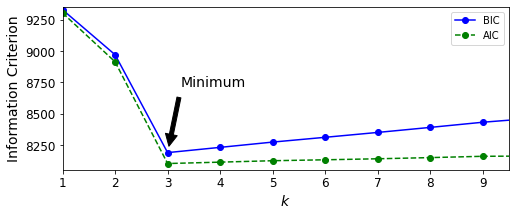

In [149]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [150]:
# Let's jointly search for the best covariance type 

min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [151]:
best_k
best_covariance_type

3

'full'

### Bayesian Gaussian Mixture Models

- Rather than manually searching for the optimal number of clusters, you can use the `BayesianGaussianMixture` class, which is capable of giving weights equal (or close) to zero to unnecessary clusters.

- Set the number of clusters `n_components` to a value that you have good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters automatically.

In [152]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [153]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

The algorithm automatically detected that only 3 components are needed.

<Figure size 576x360 with 0 Axes>

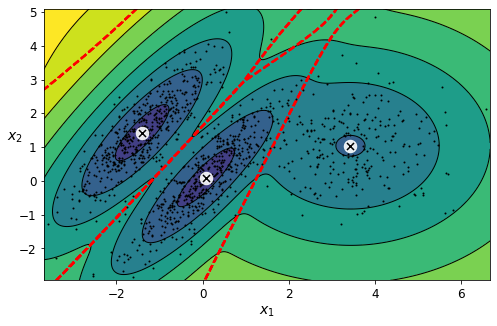

In [154]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

- In this model, the cluster parameters (including the weights, means, and covariance matrices) are not treated as fixed model parameters anymore, but as **latent random variables**, like the cluster assignments in regular Gaussian Mixtures.

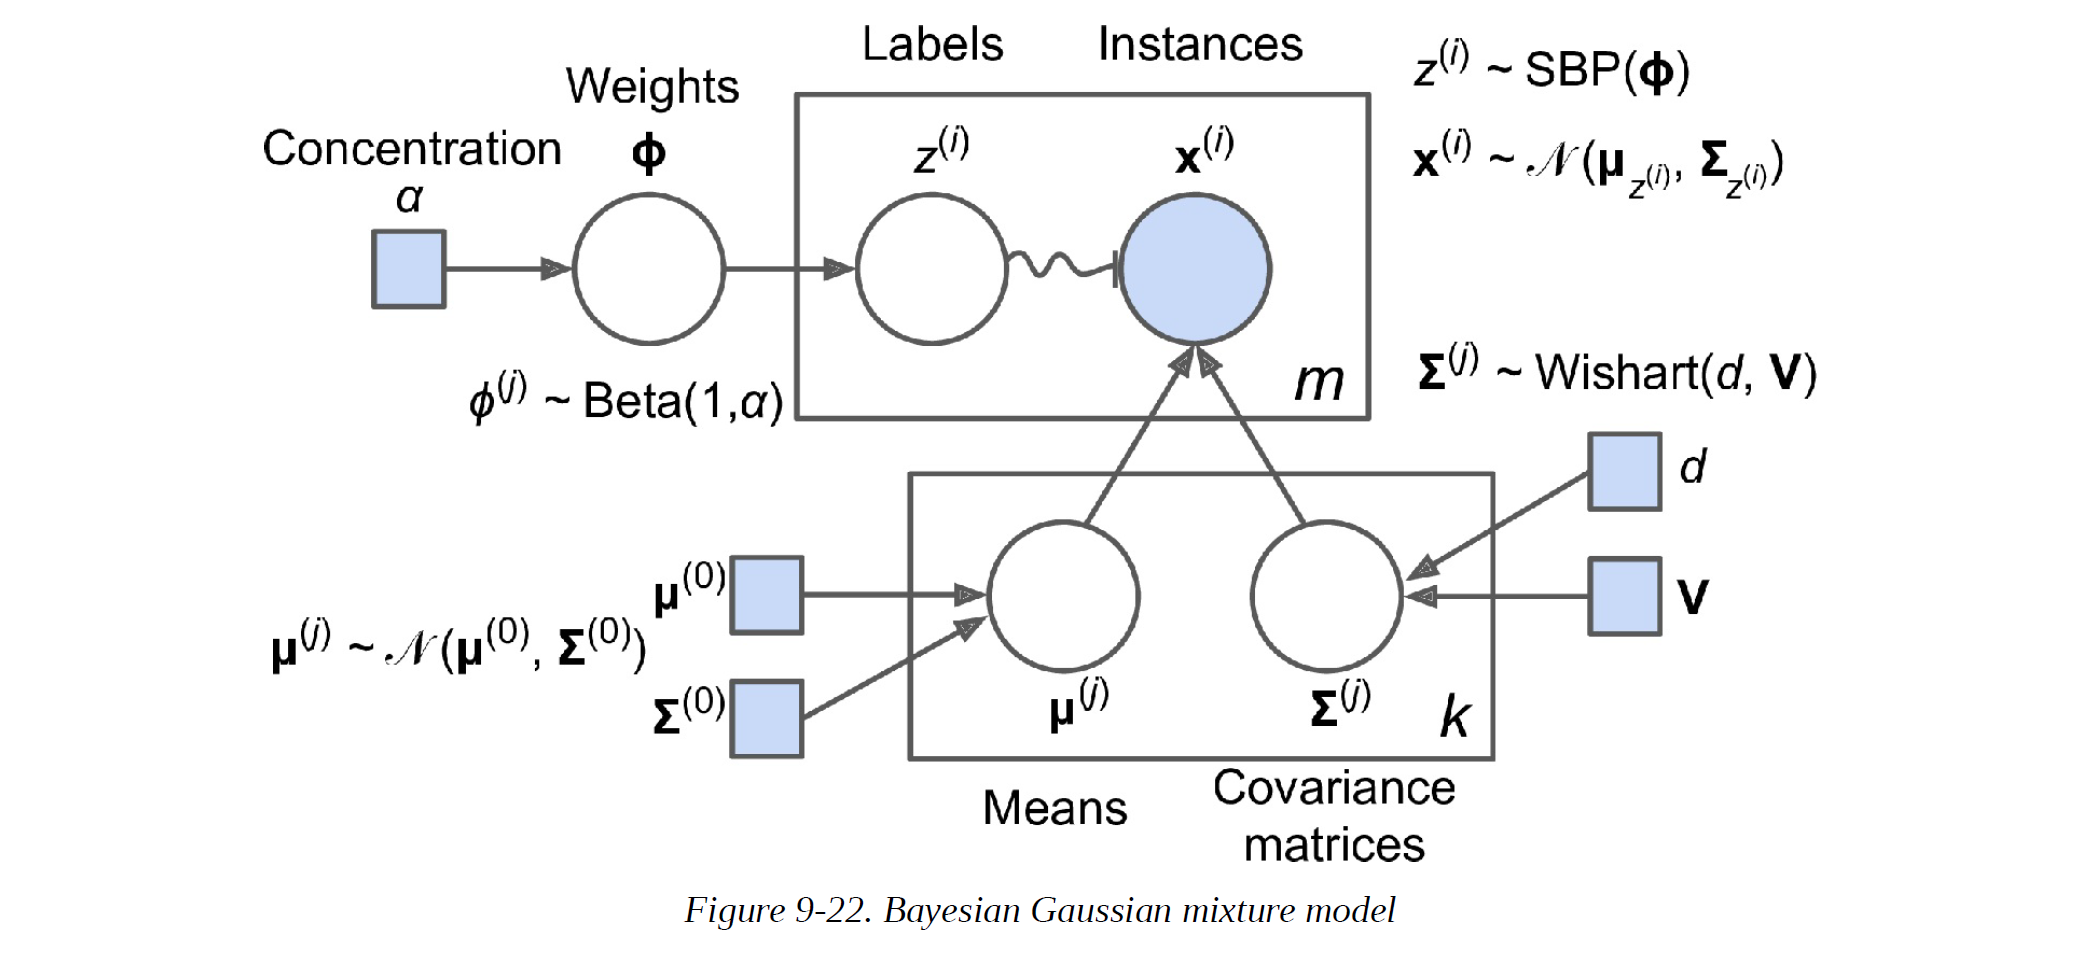